# Topic Modeling — With Tomotopy

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or single text that has been separated into smaller text chunks.

In this particular lesson, we're going to use [Tomotopy](https://github.com/bab2min/tomotopy) to topic model 379 obituaries published by *The New York Times*.

While Mallet is a fantastic tool that is widely embraced throughout the DH community, it can also pose challenges for scholars because it requires the installation and configuration of Mallet/the Java Development Kit. Tomotopy is a topic modeling tool that is written purely in Python, and it seems to be a good alternative to Mallet.

___

## Dataset

### *New York Times* Obituaries

<blockquote class="epigraph" style=" padding: 10px">

 Georgia O'Keeffe, the undisputed doyenne of American painting and a leader, with her husband, Alfred Stieglitz, of a crucial phase in the development and dissemination of American modernism, died yesterday at St. Vincent Hospital in Santa Fe, N.M.

<p class ="attribution">
    —Edith Evans Asbury, <a href="https://www.nytimes.com/1986/03/07/obituaries/georgia-o-keeffe-dead-at-98-shaper-of-modern-art-in-us.html">Georgia O'Keefe Dead At 98</a>
    </p>
    
</blockquote>

This dataset is based on data originally collected by Matt Lavin for his *Programming Historian* [TF-IDF tutorial](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf#lesson-dataset). I have re-scraped the obituaries so that the subject's name and death year is included in each text file name, and I have added 13 more ["Overlooked"](https://www.nytimes.com/interactive/2018/obituaries/overlooked.html) obituaries, including [Karen Spärck Jones](https://www.nytimes.com/2019/01/02/obituaries/karen-sparck-jones-overlooked.html), the computer scientist who introduced TF-IDF.

___

## Install Packages

In [1]:
!pip install tomotopy

  Obtaining dependency information for tomotopy from https://files.pythonhosted.org/packages/08/fb/a2dbd672ff5858834c20dae32b6ed5deaa7c5da8f5e4733b1202eaa3dd6f/tomotopy-0.12.7-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.0 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install little_mallet_wrapper

  Obtaining dependency information for little_mallet_wrapper from https://files.pythonhosted.org/packages/e3/01/7e8561e33e79b408d9526b22b50e20bfdd8e551979237ad5c972759fe7d8/little_mallet_wrapper-0.5.0-py3-none-any.whl.metadata


## Import Packages

Now let's import `tomotopy`, `little_mallet_wrapper` and the data viz library `seaborn`.

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

In [18]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Get Training Data From Text Files

Before we topic model the *NYT* obituaries, we need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts if your corpus is a collection of separate text files. In the next lesson, we'll demonstrate how to process texts that come from a CSV file.

:::{note}
    
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
:::

To get the necessary text files, we're going to make a variable and assign it the file path for the directory that contains the text files.

In [5]:
directory = "../texts/history/NYT-Obituaries/"

Then we're going to use the `glob.gob()` function to make a list of all (`*`) the `.txt` files in that directory.

In [6]:
files = glob.glob(f"{directory}/*.txt")

Next we process our texts with the function `little_mallet_wrapper.process_string()`.

This function will take every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [7]:
training_data = []
original_texts = []
titles = []

for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [8]:
len(training_data), len(original_texts), len(titles)

(379, 379, 379)

## Train Topic Model

In [9]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
    
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -10.14774802681711
Iteration: 10	Log-likelihood: -9.788526732014015
Iteration: 20	Log-likelihood: -9.648460711087514
Iteration: 30	Log-likelihood: -9.575582575358267
Iteration: 40	Log-likelihood: -9.525946364224987
Iteration: 50	Log-likelihood: -9.49530684718902
Iteration: 60	Log-likelihood: -9.463579226704619
Iteration: 70	Log-likelihood: -9.437242753407531
Iteration: 80	Log-likelihood: -9.4184855871778
Iteration: 90	Log-likelihood: -9.401415644469493

Topic Model Results:


✨Topic 0✨

miss company university years work institute ford oil research new

✨Topic 1✨

king british war peace israel said minister would prime first

✨Topic 2✨

said first became mother children time worked called like died

✨Topic 3✨

time made one years great last came death mrs year

✨Topic 4✨

general grant gen friends made smith city service office days

✨Topic 5✨

world france would german french hitler man time germany also

✨Topic 6✨

won movie broa

## Examine Top Documents and Titles

Load topic distributions

In [10]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

Make functions for displaying top documents. The `get_top_docs()` function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

In [11]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

Display top titles

In [12]:
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

miss company university years work institute ford oil research new



---


✨  
**Topic Probability**: 0.5377535820007324  
**Document**: 1946-C-E-M-Clung



✨  
**Topic Probability**: 0.4808575510978699  
**Document**: 1938-George-E-Hale



✨  
**Topic Probability**: 0.4611082971096039  
**Document**: 1930-Elmer-Sperry



✨  
**Topic Probability**: 0.4244760572910309  
**Document**: 1993-Albert-Sabin



✨  
**Topic Probability**: 0.4159257113933563  
**Document**: 1967-Gregory-Pincus



✨  
**Topic Probability**: 0.41472747921943665  
**Document**: 1943-J-H-Kellogg



In [13]:
get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

king british war peace israel said minister would prime first



---


✨  
**Topic Probability**: 0.3946332335472107  
**Document**: 1999-King-Hussein



✨  
**Topic Probability**: 0.2938331365585327  
**Document**: 1999-Hassan-II



✨  
**Topic Probability**: 0.2773841619491577  
**Document**: 2000-Charles-M-Schulz



✨  
**Topic Probability**: 0.27622556686401367  
**Document**: 1995-Yitzhak-Rabin



✨  
**Topic Probability**: 0.26774051785469055  
**Document**: 1992-Menachem-Begin



Display top documents with topic words bolded

In [14]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

king british war peace israel said minister would prime first



---


✨  
**Topic Probability**: 0.3946332335472107  
**Document**: February 8, 1999

 OBITUARY

 Death of a King; Cautious King Took Risks In Straddling Two Worlds

 By JUDITH MILLER

 King Hussein of Jordan, who died yesterday at 63, successfully straddled two worlds in more than four tumultuous decades on the throne.

 Cautious by instinct and habit, King Hussein took pride in his Western impulses and his Arab roots, though he acknowledged that the combination sometimes produced policies that even admirers criticized as erratic and conflicting.

 He was the Middle East's longest-reigning ruler, but took little comfort from mere survival. Though he once **said** he yearned for a ''hero's death'' like that of Yitzhak Rabin, the Israeli enemy he ultimately embraced as his ''brother'' and ''partner in **peace**,'' King Hussein succumbed not to the fanatic's bullet but to cancer, non-Hodgkins lymphoma, which he had suffered for eight months.

 His twin legacies -- **peace** with his neighbors, including Israel, and a fairly tolerant, stable society at home -- **would** be impressive in any context. But they are particularly so given the often violent politics of the Middle East and the unpromising country whose stewardship he inherited while still a teen-ager.

 Personally courageous, modest and unfailingly polite, King Hussein was known for his political tolerance, pardoning even those who had tried to kill him. Though he had made **war** against Israel in 1967, he was the only Arab leader secure enough to kneel before Israeli families who had lost children in a terrorist attack on his soil in 1997, offering his condolences.

 King Hussein spent the final months of his life working relentlessly for peace and a succession that he hoped **would** insure both his immediate family's control of the throne and political stability in Jordan. Less than two weeks before his death, he stunned the world by bypassing his younger brother, Prince Hassan, 51, and designating his eldest son, 37-year-old Abdullah, as heir to the throne.

 In a long, bitter letter to his brother explaining his decision and publicizing a deep family rift, King Hussein assailed Prince Hassan's performance as Regent, saying his brother's palace supporters -- climbers, he called them -- had tried to ''destroy Jordan'' by spreading vicious gossip about his wife and children and working to divide and politicize the army.

 The King also suggested that Prince Hassan, his appointed heir for 34 years, had opposed Hussein's wish that his own sons succeed his brother as King.

 King Hussein **said** the family discord had given him many sleepless nights and prompted him to intervene ''from my sickbed'' at the Mayo Clinic in Minnesota to end the intrigues and political jockeying for power. But he complimented Prince Hassan for his ''sincere efforts'' and his loyal acceptance of his demotion.

 The decision not only took Jordan and the United States by surprise, but it also demonstrated that King Hussein, though ailing and in pain, remained the undisputed ruler of his kingdom until the last days of his life.

 The King's Last Grasp At a Middle East Peace

 Apart from settling the succession, King Hussein's last efforts were aimed at advancing peace between the Arabs and Israel, a goal that had eluded two generations of his Hashemite family.

 Drawn and pale, and made bald by four rounds of chemotherapy, he had left the Mayo Clinic last October to attend the Wye summit talks in Maryland and help President Clinton coax Israeli and Palestinian negotiators into concluding the next phase of their peace accord. ''If I had an ounce of strength, I would have done my utmost to be there and to help in any way I can,'' he said in an emotional, impromptu speech at the signing ceremony.

 Saying there had been ''enough destruction, enough death, enough waste'' during the five decades of Arab-Israeli conflict, he pleaded for accommodation. ''We have no right to dictate through irresponsible action or narrow-mindedness the future of our children or their children's children,'' the King said.

 A short man who used his deep, mesmerizing voice to maximum political effect, King Hussein was to a large extent a reflection and prisoner of his geography.

 The leader of a slip of land the size of South Carolina, seven-eighths of it desert, without oil or other valuable resources, he was surrounded by far more powerful nations, many of them intermittently hostile. And over two-thirds of Jordan's more than 4.5 million people are Palestinian, many of whom feel little allegiance to him, his family or their adopted country.

 Commenting on King Hussein's lack of options, former Secretary of State Henry A. Kissinger wrote in 1979, in his book ''White House Years,'' that the King ''had the capacity neither for independent action nor for blackmail, which are the stuff of Middle Eastern politics.''

 Nevertheless, by charting a mostly centrist, pragmatic course and avoiding the radical passions and fashionable political trends that destabilized or toppled several other hereditary leaders in the Middle

 East, King Hussein created a relatively peaceful, conservative, modern country whose citizens enjoy decent government and more political freedom than those of most other Arab nations.

 Setbacks, Then Recovery On the Diplomatic Front

 His rule was notable for both bold diplomatic strokes and strategic blunders, some of them necessary, he felt, to secure his throne. Among the latter was his decision not to join the American-led coalition that forced President Saddam Hussein of Iraq to end his five-month-long occupation of Kuwait in 1991.

 And in 1967 he ignored private assurances and calls for restraint by Israel in favor of joining Egypt and Syria in their **war** against it. This cost him half of Jerusalem and all the territory on the western side of the Jordan River, the West Bank, which his grandfather had won in the 1948-1949 war against Israel.

 But after each setback, King Hussein recovered his political equilibrium and turned adversity to his advantage. Reputed among Jordanians to enjoy baraka, or God's blessing, for dodging at least 12 assassination attempts and 7 plots to overthrow him, the King ultimately accomplished what his grandfather had been unable to do: in 1994 he secured a stunning peace with Israel, which he called his reign's ''crowning achievement.''

 In July 1994, standing on the White House lawn beside Prime Minister Rabin, King Hussein initialed an accord that technically ended the state of war between the neighboring countries. And three months later, in an emotional ceremony in his own land, he became the third Arab leader to sign a formal peace treaty with Israel. ''I have at last carried out the will of King Abdullah,'' he declared on the White House lawn, referring to his grandfather.

 Indeed, the legacy of political pragmatism and the fate of Abdullah, Jordan's **first** King, strongly shaped his rule. In the summer of 1951, when he was 15, King Hussein saw his grandfather gunned down at the entrance of the silver-domed Al Aqsa Mosque in Jerusalem.

 King Hussein said another bullet had ricocheted off a medal on the uniform he had been told to wear by his grandfather, who had become a scapegoat of Arabs furious over their humiliating defeat by Israel in 1948-49 and of Palestinians angry at King Abdullah's secret meetings with Israeli leaders.

 In a memoir, King Hussein said he had learned painful, important lessons from witnessing the killing of Abdullah, a ''wonderful old man'' and a ''man of desert ways to whom

 I owe more than I can say.''

 In an interview more than 30 years later, the King said he would never forget how Abdullah's aides, his ''so-called friends,'' had scattered in all directions ''like frightened women in the night'' minutes after the killing, or how they had opened political intrigues within hours.

 The **first** rule he learned, the King said in his memoirs, was ''the unimportance of death: that when you have to die, you die,'' a fatalism he manifested at critical moments throughout his life. ''I also saw that rulers cannot depend on their advisers to save or guide them, that they must make their own decisions and go their own way,'' he said in an interview in 1993.

 This determination to keep his own counsel, and to be prepared to suffer the consequences of rash actions, allowed him to brush aside the savage criticism periodically directed at him by Westerners and

 Arabs alike.

 Though he shared Abdullah's commitment to the Arab cause, the assassination reinforced his skepticism about fellow Arab rulers. And from that day on, he carried a gun or kept one within easy reach.

 Finally, the assassination taught him that if he was to pursue Jordan's strategic interest by maintaining his grandfather's dialogue with Israel, such contacts had to remain secret. Even toward the end of his life, King Hussein refused to discuss details of what Israelis estimate were more than 500 hours of talks with every Israeli leader except Menachem Begin, a series of contacts that the King initiated in 1963.

 A Crown Prince's Son, Yet Reared in Poverty

 Descended from a powerful Arabian family that traced its lineage to the Muslim prophet Mohammed, Hussein ibn Talal ibn Hussein was born in Amman, Jordan, on Nov. 14, 1935, to Crown Prince Talal and Princess

 Zein. His family, like his country, was desperately poor. His baby sister died of pneumonia ''in the bitter cold of an Amman winter,'' he later wrote. The family house had no heat.

 Abdullah had been born and raised among the tribes of the Arabian Desert, but Hussein, in contrast, was educated at Victoria College in Alexandria, Egypt, and at Harrow and the Royal Military Academy at Sandhurst in Britain.

 Indeed, his Hashemite family owed much to Britain. To protect against French encroachment on British interests in Palestine, and to reward the family for leading the Great Arab Revolt against the Ottomans, who were allied to Germany, in 1916, Winston Churchill, then the Colonial Secretary, had carved Transjordan out of Syria in 1921, agreed to finance the emirate with a modest subsidy and given it to Abdullah to rule under British mandate. In 1946 Transjordan became independent. Abdullah, who never abandoned the dream of re-creating and ruling a modern Arab empire, became King and renamed his country the Hashemite Kingdom of Jordan.

 Unlike other Arab leaders, Abdullah -- like his grandson Hussein -- quickly grasped that he would have to deal with the Zionists. Contacts between them began as early as 1926, and in 1946 Abdullah and

 Jewish leaders agreed informally that Jordan would not oppose establishment of a Jewish state if the Zionists supported his rule over the Arab parts of Palestine. But after war erupted in 1948, Abdullah invaded the newborn state of Israel, winning control of half of Jerusalem and the West Bank.

 After Abdullah's assassination, Prince Talal, who had been treated at a Swiss clinic for schizophrenia, took the throne. When his attacks worsened, Parliament removed him, on Aug. 11, 1952, less than a month after Gamal Abdel Nasser of Egypt helped topple King Farouk in a military coup. Hussein, then 16, was proclaimed Jordan's King just as intense Arab nationalism was taking hold throughout the region.

 King Hussein always relished physical if not political danger. As if the extraordinary challenge of sheer survival were not sufficient, he parachuted, flew stunts in his jet planes and raced high-performance cars and motorcycles across the desert (insisting in his later years on being photographed with a helmet as an example of safety to his people). Risk became second nature, ''what water is to fish,'' he told a journalist. Compounding the risk, he chain-smoked cigarettes, a habit he tried innumerable times to break.

 King Hussein himself conceded that at first he made many mistakes as ruler. ''Those early years were hard for me,'' he said once in an interview. ''I learned late.''

 In 1956, when Arab nationalist passions were running high and conservative monarchies like his were a constant target of coups and assault, King Hussein tried to damp growing popular unrest by dismissing

 Sir John Bagot Glubb, the British general who commanded Jordan's Arab Legion. He also abandoned liberal measures that he and his father had adopted, declared martial law and called out the army against his own people.

 As the immediate threat to his rule receded, King Hussein gradually replaced British protectors with Americans, whose influence was growing in the Middle East as Britain's faded. According to senior

 Jordanian and American officials, ties between the Central Intelligence Agency and King Hussein were cemented in 1957 and 1958, when American intelligence officials learned of a coup plot involving

 Jordanian diplomats and warned the King.

 Relations like those, an American airlift of oil in 1958 when Jordan was boycotted by Egypt, Syria and Iraq, and monthly checks from the C.I.A. helped persuade the King that Washington was a reliable ally. (The C.I.A. payments reportedly ended in 1977, when their disclosure embarrassed the King.)

 A Costly Decision to Go To War Against Israel

 King Hussein fared less well in his second crisis: the 1967 Arab-Israeli war. Although Israel had urged restraint, he flew to Cairo shortly before the war to sign a defense treaty with President Nasser, despite Nasser's earlier plotting against him.

 Although the King later conceded that he had known he was taking a risk by siding with Syria and Egypt, he said he had feared the fury of his people, many of them Palestinians, more than Israel. A senior

 Jordanian official said most Jordanians so strongly favored the war that the King's choice, in fact, was between ''war and civil war.''

 It was a costly decision. As a result of the 1967 war, Israel controlled all of Jerusalem and the West Bank. Thousands of Palestinian refugees fled into arid Jordan, increasing the population by about half. Three-quarters of the population of Amman was now of Palestinian origin, making it the largest Palestinian city. Unlike other Arab rulers, King Hussein offered the refugees citizenship and a passport.

 In 1970, Yasir Arafat and the Palestine Liberation Organization, which increasingly viewed King Hussein as vulnerable and an obstacle to its struggle, challenged the Hashemites' control of Jordan. In despair at the prospect of a civil war, the King later acknowledged, he briefly pondered abdication, as he would again during other crises. Instead, he decided to confront Mr. Arafat.

 Though Mr. Arafat subsequently maintained that the Jordanian Army killed as many as 20,000 in putting down the unrest, conservative estimates put Palestinian losses at 2,000. While King Hussein had not sought that test of wills, his legitimacy was never challenged again.

 On the Sidelines In the 1973 War

 Drawn once into an Arab war with Israel, King Hussein would not be seduced a second time. Before the 1973 war, Israeli diplomats said, he cautioned Israel that Egypt and Syria were planning to fight, but his warning was discounted. And while the King sent a Jordanian armored brigade to fight alongside Syrian forces, he avoided fighting Israel along their common border, a decision that precluded the loss of still more land.

 Moreover, his quiet contacts with Israel continued even during the war. According to a recent book by an Israeli journalist, Samuel Segev, Hussein secretly persuaded Israel's Chief of Staff to divert artillery fire from a hill on the Golan Heights where the King was scheduled to address the troops he had sent to help the Syrians.

 King Hussein never commented publicly on accounts like those, but friends and diplomats said such disclosures by Israeli officials infuriated him.

 The King paid a high political price for his 1970 assault on the P.L.O. and his de facto abstention from the 1973 war.

 At a meeting in Rabat, Morocco, in 1974, the Arab League anointed the P.L.O. as the ''sole legitimate representative of the Palestinian people.'' Since Jordan was then more than half

 Palestinian and had ruled the West Bank between 1948 and 1967, the Arabs had decided, in effect, that he could no longer protect what amounted to his own national interests, he said in an interview a decade later.

 In his fourth major crisis, the Persian Gulf war in 1991, King Hussein in effect sided with radical Arab passions in his tilt toward Saddam Hussein. He insisted at the time -- and even later -- that he had been seeking a peaceful solution and had been neutral, saying, ''I took the side of peace.''

 But his stance infuriated Saudi Arabia and other gulf nations, not to mention Washington, whose gifts and foreign aid had helped him to survive and Jordan to prosper.

 American officials understood the King's need to placate President Hussein of Iraq, given Jordan's economic dependence on Iraqi trade and the passionate pro-Iraqi stance of most Jordanians, especially Palestinians, who saw an Iraqi victory as the first step toward regaining a homeland.

 But American patience snapped in February 1991 when King Hussein gave an emotional speech condemning the air strikes against Iraq as ''a war against all Arabs and Muslims'' aimed at ''destroying all the achievements of Iraq'' and placing the entire region ''under foreign domination.''

 The King once again paid a high price. The gulf states suspended aid, costing Jordan almost a billion dollars a year, and the influx of some 300,000 more Palestinian refugees from Kuwait and elsewhere in the gulf severely strained Jordan's economy. In Washington, the King, who owned a home in Potomac, Md., that he shared with his American-born wife, became persona non grata.

 The King Is Returned To U.S. Good Graces

 In November 1992 and even more dramatically in May 1993, the King tried to repair his relations with the United States by distancing himself from Saddam Hussein, with whom he had once enjoyed the warmest of ties -- frequent visits, nighttime barbecues and deep conversations while fishing for carp.

 Saying Iraqis were suffering gravely under the American-led boycott, he concluded that it was time for the Iraqis to embrace democratic government and end Mr. Hussein's dictatorial rule.

 Eventually a combination of fading American memories of the gulf war, intense lobbying in Washington on the King's behalf by Israeli leaders and Jordan's strategic role as a buffer between

 Iraq, Syria and Israel produced warmer relations with the new Democratic Administration. On June 18, 1993, President Clinton met King Hussein at the White House for the first time.

 While proud of his family's and his country's Arab heritage, King Hussein always understood the need to maintain contact with Israel.

 The first meeting between the King and a succession of Israeli leaders took place in mid-1963 at the London home of his doctor when he had yet to consolidate power. Subsequent sessions were held in Paris, in tents, in desert trailers, aboard boats, on a Red Sea island, even in a Mossad safe house north of Tel Aviv. Though widely rumored among politically well connected Israelis, the meetings were almost never discussed in public.

 For King Hussein, who had few illusions about the dangerous neighborhood in which he lived or the perfidy of many of his neighbors, Israel was an insurance policy against Egyptian, Syrian, Palestinian and even Iraqi ambitions. He always promised that one day he would forge a formal peace and normal relations with Israel, a goal he doggedly and often dangerously pursued throughout his rule.

 At the same time, he insisted that a peace must be comprehensive, rejecting the notion that Arab nations could make separate accommodations with Israel. For that reason, he later asserted in interviews, he opposed the Camp David peace accord between Israel and Egypt in 1978 and their peace treaty the next year.

 Despite his intense misgivings about Mr. Arafat's prior history and future intentions, he was among the first Arab leaders to endorse the Madrid peace talks sponsored by the Bush Administration in October 1991. He and Osama el-Baz, an adviser to President Hosni Mubarak of Egypt, were influential in persuading the Palestinians to take part in the ground-breaking talks.

 To encourage the effort and keep the P.L.O. under some check, he agreed to include Palestinian representatives as nominal members of the Jordanian delegation, thus defusing Israel's objections to direct negotiations with the Palestinians.

 A First Bout of Cancer, And a Change of Focus

 But the talks between Israel and its Arab enemies, which continued in Washington after the Madrid conference, dragged on inconclusively month after month. Without the knowledge of most of the officials negotiating in Washington, Prime Minister Rabin had blessed a secret effort by his Foreign Minister, Shimon Peres, to seek a breakthrough directly with the P.L.O. in Oslo. King Hussein was not informed.

 Efforts to make peace between Jordan and Israel ware given unexpected impetus from a traumatic development in the summer of 1992: King Hussein was found to have cancer. At the Mayo Clinic in Minnesota, he underwent surgery on his urinary tract.

 In September he returned to Jordan to a tumultuous welcome. Unable to imagine their country without him, more than a million Jordanians -- then almost a third of his kingdom -- lined the roads between the airport and the capital to welcome him home, waving banners, pictures and placards, cheering, chanting and weeping.

 His illness and the fervor of his welcome intensified his determination to make peace, King Hussein said shortly before the treaty with Israel was signed in 1994. While he had been ''overwhelmed by the warmth, by the feelings of the people'' upon his return, he said, ''I felt an element of fear -- of insecurity -- about what might happen if I was not there, so I knew that I had to do everything I could, in whatever time I had left, to achieve peace and make it work.''

 In October 1992, Jordan and Israel agreed in writing for the first time that their common goal was a formal peace treaty within the framework of a comprehensive Arab-Israeli settlement.

 But in the summer of 1993, the P.L.O. and Israel stunned the world -- and King Hussein -- by announcing that the Oslo talks had produced a peace agreement between them. The King felt shunted aside and feared that his poor country would be frozen out economically while billions of dollars poured into the West Bank and Gaza.

 Still, the King ignored those concerns and welcomed the accord. On Sept. 14, a day after the Oslo agreement was made official at the White House, Jordan and Israel signed their own agenda outlining the treaty they hoped to reach.

 In November, King Hussein and Foreign Minister Peres signed understandings on economic relations and other forms of cooperation at a secret meeting in Amman. And in July 1994, Israel and Jordan ended the state of war that had existed between them for nearly half a century, signing a declaration on the White House lawn that paved the way for a formal peace.

 This peace came on Oct. 26, 1994, in another stirring ceremony witnessed by President Clinton at Wadi Arava, a barren strip of desert between Jordan and Israel. ''This is without a doubt my proudest accomplishment: leaving my people a legacy of peace,'' the King said in an interview in Nadwa Palace in Amman shortly before the ceremony.

 No Arab leader was more openly upset by the assassination of Prime Minister Rabin of Israel in November 1995 than King Hussein. Traveling openly to Jerusalem for the first time since its loss to Israel in the 1967 war, he wept openly at the funeral of his former enemy, his ''brother.'' ''It is peace that has been assassinated,'' King Hussein said in his tribute as Mr. Rabin's body was laid to rest under the pines and cypresses of Mount Herzl, the cemetery of Israel's military and spiritual heroes.

 Disillusionment Grows With New Israeli Leader

 When Benjamin Netanyahu became Israel's Prime Minister in 1996, King Hussein said Arab alarm over the change of government was overwrought, and expressed confidence that the election would not undermine the quest for peace.

 But he grew disillusioned with Mr. Netanyahu's leadership, which in the King's view seriously eroded support for peace within Jordan. While the King was noting that he had risked domestic discontent by overtly pursuing peace, Mr. Netanyahu was authorizing expansion of Jewish settlements in the West Bank and housing projects in East Jerusalem, and taking other measures that offered a contrary, hawkish vision.

 In a severe blow to relations in September 1997, Mossad agents sought to kill a militant Islamic leader from Hamas on the streets of Amman, but failed. The bungled affair threatened King Hussein's need to balance his inclinations toward peace with Israel against his need to keep faith with his Palestinian constituents and avoid offending Arab neighbors.

 By the spring of 1998, many Jordanians were openly deriding the treaty with Israel as ''the King's peace,'' arguing that the agreement had brought them no tangible gain. Instead of getting better, the economy turned worse. The

 Government became less tolerant of dissent.

 The sense of crisis in Iraq also made many Jordanians fear that once again they would somehow end up paying the price. But King Hussein refused to break with Mr. Netanyahu, fearing such a step would cause greater instability, which would drive away the foreign investment that his country so desperately needs.

 The King's political troubles were overshadowed by illness once again in mid-1998. In July, he told his brother, Crown Prince Hassan, in a letter made public in Jordan that a new round of tests at Mayo showed that he probably had cancer of the lymph glands, which is usually fatal.

 An Image as a Playboy Never Quite Outlived

 In a radio broadcast from the Mayo Clinic in late July, King Hussein said he had undergone chemotherapy for the first time. ''My general condition is excellent, my mind is clear and my morale is high,'' he said, departing from the traditional secrecy that prevails in most Arab capitals when rulers fall ill. ''This is a new battle among the many battles and, with God's help, we will fully overcome this problem.''

 In more than 46 years on the throne, King Hussein had 4 wives, fathered 11 children and adopted a 12th. Besides Prince Hassan, he had another brother, Mohammed, a sister, Basma, and 15 grandchildren.

 Even in his early years as King, many women were drawn to him, and vice versa. A superb dancer who loved parties, the young King quickly established a reputation as a playboy that he never fully overcame.

 His first marriage, to Sherifa Dina Abdul Hamid, a Cambridge-educated intellectual and an older, distant cousin, ended after 18 months.

 Ms. Hamid, a lively, independent woman who found sleepy Amman dull, had one child, a daughter. But she and King Hussein had little else in common. Though they parted amicably, she later married a Palestinian commando who had taken part in the 1970 uprising against the King.

 The King's second wife was Toni Avril Gardiner, whom the King named Muna, Arabic for My Wish. The shy daughter of an English colonel at the British Embassy, Muna had little interest in politics and refused to be designated Queen. She and King Hussein had four children, including Abdullah. The marriage ended in 1972.

 The King then married Alia Baha ud-Din Toukan, the daughter of a prominent Palestinian diplomat from Nablus, on the West Bank, who had settled near Amman. He and the popular Queen had two children and adopted a daughter. Alia was killed in a helicopter accident in 1977.

 In 1978, King Hussein took a fourth wife, an American, Lisa Halaby, the daughter of Najeeb E. Halaby, a Texan descended from a Syrian family who headed the Federal Aviation Administration and then became chairman and chief executive officer of Pan American World Airways. The Queen is known as Noor, or Light, in Arabic. She and King Hussein have two sons, Hamzeh and Hashem, and two daughters, Iman and Rayah.

 Queen Noor and the King grew particularly close during his long fight with cancer. According to family friends, she urged him to designate her son Hamzeh as heir instead of Prince Hassan. While concluding that Hamzah, who is now 18, was still too young for the job, Hussein did pass over his loyal, long-serving brother in favor of Abdullah, his eldest son, who named Hamzeh his Crown Prince yesterday.

 In an interview with Life magazine shortly before his death, King Hussein said his illness had been a ''bonding'' experience for him and Queen Noor, with whom relations had occasionally been strained. Expressing his love for her, the King said, ''It is everything.''

 Chart: ''A King's Life''

 NOV. 14, 1935 Hussein ibn Talal ibn Hussein is born to Crown Prince Talal and Princess Zein. 1948 The state of Israel is created with the end of the British Mandate in Palestine. 1950

 Jordan annexes the West Bank. 1951 Hussein's grandfather, King Abdullah, is assassinated in Je 2/3ru 2/3sa 2/3lem. Hussein, who is at his side, is unhurt. 1952 He is proclaimed King, replacing his father, who is declared unfit to rule. 1953 Formally assumes his constitutional powers at age 18. 1960 Briefly mobilizes troops against Syria after Prime Minister Hazza al-Majali of Jordan is killed by a bomb placed by Syrian agents. 1967 In the Arab-Israeli war, Israel captures the West Bank and East Jerusalem from Jordan. 1970 A civil war breaks out after Yasir Arafat challenges the Hashemites' control of Jordan. 1974 Avoids confrontation with Israel in the 1973 war, but loses his status as the representative of the Palestinian people when the Arab League transfers the role to the Palestine Liberation

 Organization. 1988 Disengages Jordan from the West Bank, clearing the way for the Palestinians to declare a state. 1990-91 Infuriates Washington and his Arab neighbors with his support of Saddam Hussein of Iraq (shown here in 1988) in the confrontation following the Iraqi invasion of Kuwait. 1991 Endorses the Madrid peace con 2/3fer 2/3ence. His inclusion of Palestinians in the Jordanian delegation smoothes the way for their talks with Israel. 1992 Is found to have cancer and undergoes surgery at the Mayo Clinic in Minnesota. 1993 Meets with President Clinton at the White House for the first time. 1994 Signs a declaration with Israel ending the state of war that had lasted since 1948. 1998 Returns to the United States for cancer treatment. In October he attends peace talks in Wye, Md., and helps Mr. Clinton coax Israeli and Palestinian negotiators into concluding an accord. 1999 Home in Jordan, he changes the line of succession by passing the crown from his brother to his son Abdullah. He dies Feb. 7.

 





✨  
**Topic Probability**: 0.2938331365585327  
**Document**: July 24, 1999

 OBITUARY

 Hassan II of Morocco Dies at 70; A Monarch Oriented to the West

 By JOSEPH R. GREGORY

 King Hassan II, who ruled Morocco for 38 years, acted as a go-between in Egyptian-Israeli efforts to make **peace** and prolonged the life of his 300-year-old dynasty in an era when monarchies in Libya,

 Egypt, Iraq and Iran fell to socialist revolutions or the force of militant Islam, died yesterday in Rabat. He was 70.

 The cause of death was a heart attack, Crown Prince Sidi Mohammed, the King's eldest son and successor, announced on state television.

 The King, who had been in fragile health since he was hospitalized in the United States four years ago for lung problems, had been admitted earlier in the day to the Avicenne hospital in Rabat, the capital, with an acute lung infection, according to a statement by the palace. Moroccan television **said** the funeral **would** be Sunday. The White House **said** that President Clinton planned to attend.

 As King, Sidi Mohammed is expected to continue his father's policies, including close ties with Washington and active pursuit of **peace** in the Middle East.

 The United States and its allies considered King Hassan one of the most Western-oriented of Arab leaders, a ruler who outmaneuvered Islamic militants in his country and stood out among his peers for his openness to rapprochement with Israel.

 Through the years he acted as an intermediary in Middle East diplomacy, helping to arrange a visit to Jerusalem in 1977 by Egypt's President, Anwar el-Sadat, and during the 1980's, meeting with the Israeli leaders Yitzhak Rabin and Shimon Peres when other Arabs shunned them.

 A master at managing Morocco's complex quilt of ethnic and ideological forces, he maintained a hold on power that was by turns iron-fisted and deftly offhand. He survived half a dozen assassination attempts and uprisings.

 On one occasion, he intimidated the leader of rebel troops by looking him in the eye and reciting the **first** verse of the Koran. Another time, when pilots of his air force attacked his Boeing 727 jetliner, the King, himself a pilot, seized the radio and shouted, ''Stop firing! The tyrant is dead!'' -- fooling the rebels into breaking off their attack.

 The heir to the Alawite dynasty, which claimed direct descent from the Prophet Mohammed and ruled the Sharifian empire of the Western Sahara, Hassan II was the author of Morocco's **first** Constitution.

 But he was at heart an autocrat, and democracy waxed and waned at his pleasure.

 He tolerated opposition parties and a relatively free press that could offer opinions on policy matters. But criticism of the monarchy was forbidden, and his ruthlessness in crushing opponents was criticized by human rights groups.

 Economic and political reform proceeded steadily through his years in power. Though the pace was slower than his critics **would** have liked, said William Zartman, director of African Studies at Johns Hopkins University in Baltimore, many would agree that the country was better off during the final years of his reign than it was when he came to power.

 His success lay in an ability to be different things to different people. He kept Morocco's elite content with royal patronage and instituted market-oriented reforms that improved the lives of the urban middle class. He used his position as ''Commander of the Faithful'' to woo the rural peasantry, quadruple the number of mosques and build the world's largest, the Great

 Mosque of Hassan the II. Completed in 1993, the 54-acre complex was built on the edge of the sea near Casablanca, with a tower more than 650 feet tall and equipped with a laser that beamed at night toward Mecca. ''He had deep understanding from the early days of the tribal mentality of Morocco and the importance of the throne as a unifying force,'' said Robert H. Pelletreau, a former Assistant

 Secretary of State for Near Eastern Affairs, who knew the King well. ''He was a superb student, and he could be exceedingly charming.''

 Moroccans said of King Hassan that he had ''baraka,'' or ''blessedness,'' an Arabic expression for a charismatic person blessed with divine protection. Yet when he ascended the throne on Feb. 26, 1961, most observers expected him to fail.

 Worked With Father To Buttress Monarchy

 Moulay Hassan ben Mohammed Alaoui was born on July 9, 1929, the oldest of six children of Sultan Sidi Mohammed ben Youssef. Most of Morocco was then a protectorate of France, except for sections governed by Spain in the northwest and southern coast and the city of Tangier, an international zone.

 As World War II unfolded, resistance to colonial rule grew. After the fall of France, the Free French forces promised independence if Morocco would cooperate in the **war** against the Axis, a promise that Paris proved unwilling to keep.

 After the **war**, tension rose between the Sultan and the French, but the young Prince Moulay Hassan was educated as befitted the heir of two traditions: He attended the imperial college at Rabat, where instruction was in Arabic and French. Later he earned a law degree from the University of Bordeaux and served in the French Navy aboard the battleship Jeanne d'Arc.

 But his father's agitation for Moroccan self-government continued, and in 1953 the French forced the Sultan into exile. In 1954 and 1955, as rioting and guerrilla warfare increased, Prince Moulay's father regained his title, and the following year, Morocco won independence.

 Prince Moulay worked with his father, now Mohammed V, to maintain the monarchy's authority during a time of social discontent and the conflicting expectations of those who fought for Moroccan independence.

 In 1957, he became the commander in chief of the Royal Moroccan Army, which was splintered between officers who had been loyal to the French and the former rebels. Prince Moulay kept the military occupied with civilian projects, and led it to victory against rebel Berber tribesmen in the Rif mountains in 1958.

 But in the shantytowns of Rabat, Casablanca and other cities, opposition simmered against the royal house. Though the monarchy looked to Paris and Washington for financial support, it needed to placate the leftist opposition. Declaring neutrality in the cold war, the Prince made overtures to Moscow and accepted Soviet military aid. ''As an Islamic people,'' he told The Associated

 Press in 1961, ''we have the right to practice bigamy. We can wed East and West and be faithful to both.''

 Such comments caused consternation in Western capitals. So did the reputation of the young Prince, whom the Western press often portrayed as a playboy who liked gambling and actresses and was overly concerned with his wardrobe.

 After Mohammed V died of heart failure following what was expected to be a minor operation, Prince Moulay, who had been named Prime Minister in 1960, moved quickly to establish his rule. His Constitution, which was ratified in 1962, guaranteed freedom of the press and of religion, and created an elected legislature.

 But the new Parliament, fractured by bitter rivalries, proved ineffectual. The new King retained the power to name the Prime Minister, disband the legislature and control the army.

 In the mid-1960's, student agitation led to a wave of rioting and arrests. Opposition figures fled abroad or were imprisoned; some were executed. In 1965 Mehdi Ben Barka, a prominent nationalist and opposition leader, was kidnapped in Paris and never seen again.

 The King's right-hand man, the Minister of Interior, Mohammed Oufkir, was linked to the disappearance, but the case was never pressed.

 In June of that year, Hassan dissolved Parliament and instituted a state of emergency, wielding absolute power until a new Constitution was adopted in 1970. The Constitution restored limited parliamentary government, but discontent simmered amid continuing poverty and official corruption.

 How He Overcame Two Deadly Coups

 On July 10, 1971, King Hassan invited some 400 prominent Moroccans, diplomats and other guests to his seaside palace of Skhirat near Rabat to celebrate his 42d birthday. The festivities ended in a burst of gunfire as more than 1,000 mutinous troops attacked the palace, hurling grenades and spraying the grounds with small-arms fire.

 Nearly 100 guests were killed and more than 125 wounded. The King hid in a bathroom.

 When the firing died down, he re-emerged to find himself face to face with one of the rebel commanders. Keeping eye contact, he recited the opening verse of the Koran, and the rebel knelt and kissed his hand. Loyal troops crushed the revolt, killing more than 150 rebels and capturing 900 others, many of them young military cadets.

 A dozen high-ranking, conservative officers were executed. Mohammed Oufkir was named Minister of Defense.

 A little more than 12 months later, on Aug. 16, 1972, the King was returning from Paris aboard his private Boeing 727 when it encountered an unscheduled escort of four Royal Moroccan Air Force F-5 fighters.

 As the Boeing approached Rabat's airport, the fighters fired on the plane, knocking out an engine and scoring other hits.

 The Boeing landed safely, but the renegade pilots continued to strafe the runway until Hassan radioed them, saying the King had been killed. The rebels broke off the attack. Within hours, key participants in the coup were arrested and shot.

 One of their leaders proved to be General Oufkir, who apparently had been secretly involved in the earlier attack on the palace. According to official reports, the general committed suicide, but his body was supposedly found with several wounds. His widow and six children were placed under house arrest and were not released until February 1991, in an amnesty marking the King's 30 years in power.

 Uniting Moroccans Over Western Sahara

 As the 1970's unfolded, the King took several steps to damp domestic turmoil. In 1973 he put through measures to increase Moroccan ownership and employment in companies doing business in Morocco and also redistributed farmland owned by foreigners to rural peasants. ''He alternated very cleverly between the kinds of reforms that would be popular with the people and the kinds of reforms popular with the ruling elite and in doing so was popular with both,'' said Mr. Pelletreau, the former American diplomat.

 In November 1975, in a move that would unite Moroccans against a common foe, Hassan reasserted his country's authority over the Western Sahara, a region claimed by both Morocco and Mauritania but still officially under Spanish administration, by trucking some 350,000 civilians under army escort to the region, where they staged a march.

 The move help secure Morocco's claim but ignited a war with guerrillas of the Polisario Front, who had been fighting for independence from Spain. Libya and Algeria supported the guerrillas in their war against the Moroccan Army. In 1984, the King signed an accord with Col. Muammar el-Qaddafi that ended Libyan backing for the insurgents. Algeria, plagued by its own domestic problems, could give them only minimal support. Militarily, Morocco eventually triumphed, agreeing to a cease-fire with Polisario in 1991 that left the country in control of most the region.

 The Polisario Front continues to hang on, but the United Nations is scheduling a referendum in March to determine the future of the region's 300,000 people.

 Seen as Bridge To the Israelis

 King Hassan was adept at managing Arab-Israeli relations, and he liked to say he viewed Morocco's Jewish population, which numbers around 8,000, as a bridge between Israelis and Arabs. During World

 War II his father, Mohammed V, had defied the Axis and protected his country's Jews. In 1956, the year of Moroccan independence, there were about 275,000 Jews in Morocco. Most were allowed to emigrate to Israel, Europe and elsewhere.

 During the Arab-Israeli wars of 1967 and 1973, King Hassan contributed a nominal number of troops to support Egypt and Syria. Nevertheless, he kept his channels open with Israel.

 In 1982 he was the host of a meeting of Arab leaders in Fez where he pushed through agreement on a peace plan that called for the creation of a Palestinian state with Jerusalem as its capital but implicitly recognized Israel's right to exist. The plan, though rejected by Israel, laid the groundwork for the King to meet with Prime Minister Peres in 1986, a meeting that caused the King to be criticized by Arab leaders. He responded by saying they had neither the ability to make war on Israel nor the willingness to make peace.

 In September 1993, Morocco gave de facto recognition to Israel by welcoming Prime Minister Rabin, marking the first official visit by an Israeli leader to an Arab nation other than Egypt.

 Despite such bold gestures, he was careful to play both sides of a conflict when necessary. After the Iraqi invasion of Kuwait in 1990, he sent 1,300 troops to Saudi Arabia, a gesture that pleased the West. At the time he expressed sympathy for the plight of Iraqi suffering under United Nations sanctions and ordered members of the Moroccan royal family to supervise the collection of supplies to ease their plight.

 Gradual Freedom And Continuing Poverty

 Despite aid from the West, sporadic reform efforts, and an estimated $2 billion a year sent home by Moroccans working abroad, the economic situation during the 1990's remained difficult for most of Morocco's 25 million people, two-thirds of whom are under the age of 25.

 In the census of 1994, the urban population exceeded the rural population for the first time. Unrest generally declined in the cities, where most of the economic reforms were concentrated. Although unemployment remained a problem and the strains of a relatively slow pace of development continued, political freedom gradually increased. In the early 1990's, pressure from human rights groups reduced the number of political prisoners and reports of incidents of torture declined.

 In recent years, the King pushed his version of ''Hassanian democracy,'' which has widened political freedom while retaining the decisive power of the King. After elections last year, in which leftist parties gained the largest bloc of seats, the King appointed an old leftist adversary, Abdurrahman Youssufi, as Prime Minister, but the new Government has been widely criticized for failing to fulfill election promises to deal with poverty and other social problems.

 Like his father, the Crown Prince comes to the throne with the reputation of a playboy. At 35, he is still single in a society that emphasizes family ties. He was educated in France, where he received a degree in law and studied international relations. In addition to Arabic and French, he speaks Spanish and English. In recent years, as illness caused the King to withdraw progressively from active public life, the Crown Prince began to take a more active role in public as second in command of the Moroccan military and in helping to direct Government aid to the poor.

 In February the King sent the Crown Prince as his representative to the funeral of King Hussein of Jordan. With Sidi Mohammed's accession to the throne, his younger brother Moulay Rashid will become

 Crown Prince.

 In addition to his two sons, the King is survived by his wife, Lalla Latifa, a commoner who is officially described as the Mother of the Royal Children, and three daughters.

 Palace officials say the transition will bring no change in key Moroccan policies, including the longstanding alliance with the United States and strong support for peace between Israel and its Arab neighbors. The aides also said Sidi Mohammed would continue his father's policy of insisting on Moroccan sovereignty over the disputed territory of the Western Sahara.

 Nonetheless, the Crown Prince is expected to take his distance from some of his father's closest advisers, principally the Interior Minister, Driss Basri, who in his 20 years in that post has been associated with hard-line policies toward domestic opposition from both the left and the Islamic fundamentalists, who have been excluded from forming parties to compete in elections.

 Aides to King Hassan said recently that Sidi Mohammed was likely to move hard-liners in his father's entourage aside in effort to accelerate democratic reforms that his father had initiated in recent years.

 Despite his moves toward democracy, throughout his reign King Hassan remained jealous of preserving the symbols of his monarchy. He refused, for instance, to abandon the practice of having his subjects show their fealty by kissing his hand, even though advisers urged him to end it.

 Whether he donned a business suit to meet with Western leaders or appeared in traditional white robes to preside over religious ceremonies, the King was a leader of commanding presence, an eloquent orator in Arabic who spoke excellent French and capable English. ''His golf outings were the picture of an Oriental potentate,'' recalled Mr. Pelletreau, the diplomat. ''He would be accompanied by a vast entourage. If he wanted to sit, chairs would appear, and his guests would be offered sherbet.''

 Through intelligence, charm and cunning, he steered an absolute monarchy into the modern world. ''He sheltered Morocco from the various political winds that blew across the Arab world and caused such turmoil in other countries,'' Mr. Pelletreau said.

 





✨  
**Topic Probability**: 0.2773841619491577  
**Document**: February 14, 2000

 OBITUARY

 Charles M. Schulz, 'Peanuts' Creator, Dies at 77

 By SARAH BOXER

 Charles M. Schulz, the creator of ''Peanuts,'' the tender and sage comic strip starring Charlie Brown and Snoopy that is read by 355 million people around the world, died in his sleep on Saturday night at his home in Santa Rosa, Calif., just hours before his last cartoon ran in the Sunday newspapers. He was 77.

 The cause of death was colon cancer, **said** Paige Braddock, creative director for Charles M. Schulz Creative Associates.

 Mr. Schulz drew ''Peanuts'' for nearly half a century. He swore that no one else **would** ever draw the comic strip and he kept his word. For years he drew ''Peanuts'' with a hand tremor. He finally put down his pen when he received a diagnosis of colon cancer after abdominal surgery in November.

 His last daily strip ran on Jan. 3. His last Sunday page, which ran yesterday, carried a signed farewell in which he **said**, ''Charlie Brown, Snoopy, Linus, Lucy . . . how can I ever forget them. . . .'' His wife, Jeannie, said, ''He had done everything he wanted.''

 Lynn Johnston, a friend of Mr. Schulz and the creator of ''For Better or for Worse,'' told The Associated Press, ''It's amazing that he dies just before his last strip is published.'' Such an ending, she said, was ''as if he had written it that way.''

 She recalled something Mr. Schulz told her as she sat in the hospital with him last year: ''You control all these characters and the lives they live. You decide when they get up in the morning, when they're going to fight with their friends, when they're going to lose the game. Isn't it amazing how you have no control over your real life?'' But, Ms. Johnston said, ''I think, in a way, he did.''

 The life of ''Peanuts'' and Charles Schulz were completely intertwined. ''The strip and he were one,'' said Patrick McDonnell, who draws the cartoon ''Mutts.'' ''He put his heart and soul into that strip.'' ''Peanuts,'' which reached readers in 75 countries, 2,600 papers and 21 languages every day, made Mr. Schulz very rich. The ''Peanuts'' strips, merchandise and product endorsements brought in $1.1 billion a year. And Mr. Schulz was said to have earned about $30 million to $40 million annually.

 His saga of Charlie Brown, Snoopy, Lucy and Linus ''is arguably the longest story ever told by one human being,'' Robert Thompson, a professor of popular culture at Syracuse University, observed on the PBS ''NewsHour'' with Jim Lehrer, longer than any epic poem, any Tolstoy novel, any Wagner opera. In all Mr. Schulz drew more than 18,250 strips in nearly 50 years.

 Jules Feiffer, the cartoonist and playwright, said that the ''Peanuts'' characters endure because they were the **first** real children in the comics pages, ones with doubts and anxieties. And there were a lot of them. ''Linus,

 Lucy, Charlie Brown -- these interesting little people formed a repertory company,'' he said.

 A Long-Running Ensemble Act

 The cast of ''Peanuts'' changed remarkably little. It included Charlie Brown, a wishy-washy boy with a tree-loving kite and a losing baseball team; Snoopy, an unflappable beagle with a fancy inner life; Lucy, a fussbudget with a football and a curbside psychiatric clinic; Linus, a philosophical blanket-carrier; Sally, Charlie Brown's romantic little sister; Schroeder, a virtuoso on the toy piano and a Beethoven devotee; Peppermint

 Patty, a narcoleptic D-minus student; and, in later years, Woodstock, a small, expressive but speechless bird.

 Mr. Schulz remembered waking up in the night many years ago and thinking, ''Good grief, who are all these little people? Must I live with them for the rest of my life?'' The answer was yes.

 Charles Monroe Schulz, the son of Carl Schulz, a barber, like Charlie Brown's father, and the former Dena Halverson, was born in Minneapolis on Nov. 26, 1922. Young Charles was nicknamed Sparky after the horse Spark Plug in the comic strip ''Barney

 Google.'' He had a black-and-white dog named Spike (memorialized in the character of Snoopy's skinny Western brother).

 He wanted to be a cartoonist as a child and practiced by drawing Popeye. ''Someday, Charles, you're going to be an artist,'' a kindergarten teacher told him after looking at his drawing of a man shoveling snow. His ambition was to do a comic strip as good as George Herriman's ''Krazy Kat,'' but Mr. Schulz also admired Picasso, Andrew Wyeth and Edward Hopper. Snoopy kept a van Gogh and a Wyeth in his doghouse.

 The hurts of Mr. Schulz's early years provided a lifetime of material. At Central High School in St. Paul, he flunked Latin, English, algebra and physics. ''Ripley's Believe It or Not!'' accepted one of his drawings when he was 15 -- a picture of Spike illustrating ''a hunting dog that eats pins, tacks and razor blades'' -- but the cartoons he drew for his high school yearbook were rejected. Mr.

 Schulz remembered his failures more vividly than his successes.

 After his high school graduation he took a correspondence course from Art Instruction Inc., but before he could start a career he was drafted into the Army. He left for boot camp only days after his mother died of cancer. (Mr. Schulz later suggested that this coincidence might have been the reason for his lifelong hatred of travel.) During World War II, from 1943 to 1945, Mr. Schulz served in France and Germany and became a staff sergeant in the 20th Armored Division. He once refused to toss a grenade into an artillery emplacement because he saw a little dog wander into it.

 After the **war** he tried various odd jobs: lettering the comics at a Catholic magazine called Timeless Topix; drawing a weekly cartoon called ''Li'l Folks,'' the precursor to ''Peanuts,'' for the St. Paul Pioneer

 Press; and selling occasional spot cartoons to The Saturday Evening Post.

 He also taught at Art Instruction Inc. There he fell in love with a redhead, Donna Johnson, and proposed marriage. She turned him down and married a fireman instead. He never forgot. Ms. Johnson became the Little Red-Haired Girl, Charlie Brown's unrequited love, who was often talked about but never seen in the strip. Mr. Schulz married Joyce Halverson in 1949; the marriage ended in divorce. ''You can't create humor out of happiness,'' Mr. Schulz said in his 1980 book, ''Charlie Brown, Snoopy and Me.'' ''I'm astonished at the number of people who write to me saying, 'Why can't you create happy stories for us? Why does Charlie Brown always have to lose? Why can't you let him kick the football?' Well, there is nothing funny about the person who gets to kick the football.''

 The strip's start was bittersweet. In 1949 Mr. Schulz submitted some of his ''Li'l Folks'' comic strips to United Feature Syndicate. The syndicate liked the strip but insisted on calling it ''Peanuts'' because ''Li'l Folks'' was too similar to the name of another strip. ''I was very upset with the title,'' Mr. Schulz once said, ''and still am.''

 On Oct. 2, 1950, the **first** ''Peanuts'' strip was published. It depicted two children sitting on the sidewalk discussing Charlie Brown: ''Well, here comes ol' Charlie Brown!'' . . . ''Good ol'

 Charlie Brown'' . . . ''Yes, sir! Good ol' Charlie Brown.'' And then, as Charlie Brown passes them, ''How I hate him!''

 That year seven newspapers bought ''Peanuts,'' and Mr. Schulz earned $90 a week in royalties. But by 1953 the cartoon was a hit and he was earning $30,000 a year. In 1955 (and again in 1964) the National Cartoonists Society awarded

 Mr. Schulz the Reuben for being the outstanding cartoonist of the year. He received the Yale Humor Award in 1956 and the School Bell Award from the National Education Association in 1960.

 Unrequited Love With Roots in Real Life ''Peanuts'' was based on repetition and predictability. As Mr. Schulz put it, ''All the loves in the strip are unrequited; all the baseball games are lost; all the test scores are D-minuses; the Great Pumpkin never comes; and the football is always pulled away.'' One of the few innovations Mr. Schulz introduced was allowing Snoopy (after eight years) to stand on two feet and to have his thoughts written out in balloons.

 Snoopy could always be counted on to nap, fantasize and wonder when his next meal **would** arrive. Charlie Brown, the round-headed blockhead (named after one of Mr. Schulz's childhood friends, not after the cartoonist himself), could always be counted on to persevere despite constant failure. He once held onto the string of a kite that was stuck in a tree for eight days running, until the rain made him stop. At the time it was the longest run of immobility for any cartoon character. His first home run came after nearly 43 years of strike outs, on March 30, 1993.

 No adult ever appeared in ''Peanuts,'' though in television specials there were occasional wah-wah sounds denoting the voices of teachers and parents. As Mr. Schulz once put it, ''Well, there just isn't room for them.''

 Curses never got worse than ''Aaugh!'' ''Good grief,'' ''Rats!'' ''Curse you, Red Baron!'' or a knot of lines scrunched up in frustration.

 The strips were just the beginning. In 1952 Mr. Schulz started turning out ''Peanuts'' books: ''Peanuts,'' ''More Peanuts,'' ''Good Grief, More Peanuts!'' ''Good

 Ol' Charlie Brown,'' ''Happiness Is a Warm Puppy'' and dozens more. New compilations rolled off the presses every year for decades.

 Eventually ''Peanuts'' was translated into Serbo-Croatian, Malay, Chinese, Tlingit, Catalan and 15 other languages. Books came out with titles like, ''Het Grote Snoopy Winterspelletjes-Boek'' and ''Du

 Bist Sub, Charlie Braun.''

 The 1960's brought animated ''Peanuts'' television specials. The first was ''A Charlie Brown Christmas,'' which Mr. Schulz wrote in one weekend with Lee Mendelson. Accompanied by Vince Guaraldi's jazz piano, animated by Bill Melendez and unassisted by any laugh track, ''A Charlie Brown Christmas'' was shown on CBS in 1965 (and still runs every winter). It won an Emmy and a

 Peabody. Many more television specials followed, including ''It's the Great Pumpkin, Charlie Brown.'' Five of the specials won Emmys. There were also ''Peanuts'' feature films, including ''A Boy Named Charlie Brown.''

 The takeoffs came rolling in. In 1966 the Royal Guardsmen wrote a rock song, ''Snoopy and the Red Baron.'' In 1967 a musical, ''You're a Good Man, Charlie Brown,'' was produced Off Broadway. (A 1999 revival on Broadway won two Tony Awards.) ''Peanuts Gallery,'' a concerto, was composed by Ellen Taaffe Zwilich and had its premiere at Carnegie

 Hall in 1997. Mr. Schulz received the Ordre des Arts et des Lettres from the French Ministry of Culture. In 1990 his work was shown at the Louvre; the gala had Snoopys in couture.

 Many pundits tried to put their finger on the ''Peanuts'' spell and they generally rambled on in a vaguely philosophical vein. Umberto Eco, who wrote the introduction to the first Italian ''Peanuts'' book, referred to Mr. Schulz's work as ''poesie interrompue,'' or interrupted poetry, and, using Freud, Beckett, Adler and Thomas Mann to back him up, said, ''These children affect us because in a certain sense they are monsters; they are the monstrous infantile reductions of all the neuroses of a modern citizen of the industrial civilization.''

 In an essay called ''Peanuts: The Americanization of Augustine,'' Arthur Asa Berger, a scholar of popular culture, observed that Mr. Schulz was ''a mirthful moralist'' and a master of Freudian humor, humor that ''serves to mask aggression.''

 Mr. Berger called Snoopy ''an existential hero in every sense of the term,'' a dog who ''strives, with dogged persistence and unyielding courage, to overcome what seems to be his fate -- that he is a dog.'' He is ''a bon vivant, he participates in history, he has an incredible imagination, he is witty, he expresses himself with virtuosity in any number of ways (eye movements, ear movements, tail movements, wisecracks, facial expressions) and he is superb as mimic and dancer.''

 The most concerted attempt to bring ''Peanuts'' to heel philosophically came in the 1960's when Robert L. Short, a **minister**, wrote two books on ''Peanuts'' theology, ''The Gospel According to Peanuts'' (1964) and ''The Parables of Peanuts'' (1968). The Rev. Short saw signs of original sin in the ''Peanuts'' children, who were unable ''to produce any radical change for the better in themselves -- or in each other.'' He saw ''the hazard of worshiping deities'' demonstrated in Linus's belief in the Great Pumpkin.

 And he called Snoopy ''a typical Christian,'' a flawed character who is nonetheless good: ''He is lazy, he is a 'chow hound' without parallel, he is bitingly sarcastic, he is frequently a coward,'' Mr. Short wrote. But he is ''a hound of heaven.''

 If the ''Peanuts'' characters left themselves open to the maunderings of philosophers, ministers and analysts, they were even more vulnerable to toy, card, book and clothing manufacturers.

 The licensing madness began in 1958 when the first plastic Snoopy and Charlie Brown came out. In 1960 Hallmark began printing ''Peanuts'' cards and party goods. Then came sweatshirts and pajamas, thermoses and lunch boxes. Plush Snoopy came in 1965. Woodstock slippers, Lucy picture frames, Charlie Brown music boxes followed. Mr. Schulz vetted all products for appropriateness and rejected some: baby wipes for aesthetic reasons, ashtrays, vitamins, sugary breakfast cereals, ice skates and tennis rackets.

 There were commercials too. In 1957 the ''Peanuts'' characters started selling Ford Falcons. For 15 years they worked for the Metropolitan Life Insurance Company. Snoopy was the official mascot of NASA, and in 1969 NASA's lunar excursion module on the Apollo 11 mission was called Snoopy. The command module was Charlie Brown.

 A Menagerie Of Merchandising

 By 1999 there were 20,000 different new products each year adorned by ''Peanuts'' characters. In 1994 Mr. Schulz was inducted into the Licensing Industry Merchandisers' Association Hall of Fame. Jim Davis, the creator of the cartoon ''Garfield,'' who is no stranger to commercialization, said, ''Schulz created the industry as far as cartooning and licensing go.''

 When asked whether he minded his characters selling merchandise, Mr. Schulz said, ''I don't think there's such a thing as going commercial with a comic strip because a comic strip is a commercial right from the beginning.''

 It is there to sell newspapers, he said.

 In 1989 Forbes listed the cartoonist among the ten wealthiest entertainers, earning $32 million a year.

 Nonetheless his lifestyle remained simple. Mr. Schulz, who hated to travel, said he would have been happy living his whole life in Minneapolis. But ''I had a restless first wife,'' so they moved to Sebastopol, Calif., and he set up his studio in Santa Rosa. In 1969, after the local ice rink closed, he and his wife, Joyce, built a new one, the Redwood Empire Ice Skating Arena. ''Because of Snoopy's hockey playing,''

 Mr. Schulz explained, ''I have to keep in the game. So I bought an arena.''

 Charles and Joyce Schulz had five children, but the marriage ended in divorce in 1972. He said, ''I don't think she liked me anymore, and I just got up and left one day.'' A year later he met Jeannie Clyde at the ice rink and married her.

 Mr. Schulz's workday typically began with a trip in his Mercedes (license plate WDSTK1, after Woodstock) down from the hills near where he lived, breakfast at the ice rink's Warm Puppy Snack Bar, a trip to his stone-and-redwood studio at One

 Snoopy Place to draw his strip, lunch at the ice rink, more work in the afternoon in his studio and dinner at a restaurant with his wife.

 While his small staff dealt with the commercial end of the business, he attended only to drawing. He used a yellow legal pad for sketching and drew with an Esterbrook Radial pen. He would start doodling until something funny happened. He never took suggestions from anyone (though he did draw on conversations, newspapers, Bartlett's Familiar Quotations, and his children's antics. ''Drawing a daily comic strip is not unlike having an English theme hanging over your head every day for the rest of your life,'' he once said. He could do a strip an hour and six strips a day, but preferred not to. He generally kept three months ahead of publication and never took more than ten days off at a time, and then only reluctantly. ''Peanuts'' continued to appear when Mr. Schulz had quadruple-bypass heart surgery in 1981. And it was only under orders from United Feature that he took off for five weeks in 1997 for his 75th birthday.

 Jeannie Schulz once said that all the characters in ''Peanuts'' are parts of her husband. ''He's crabby like Lucy, diffident like Charlie Brown. There's a lot of Linus -- he's philosophical and wondering about life.'' Like Schroeder, he loved classical music, though he preferred Brahms to Beethoven. And like Snoopy, he was a **war** buff. Snoopy had all of World War I covered. But Mr. Schulz knew all the World War II battlegrounds and was the head of a capital fund-raising campaign for the National D-Day Memorial.

 He was a member of the Church of God, where he was a Sunday school teacher and administrator and would occasionally deliver the Sunday sermon.

 People described Mr. Schulz as looking like a druggist. He found Garry Trudeau's ''Doonesbury'' and Walt Kelly's ''Pogo'' too political, but he admired the work of Cathy Guisewite, the cartoonist who draws ''Cathy,'' and Ms. Johnston, of ''For Better or for Worse.'' His favorite ice cream flavor was vanilla.

 Mr. Schulz is survived by his wife, a philanthropist, and his children: Meredith Hodges, who raises mules in Loveland, Colo.; Charles Jr. (called Monte), a novelist in Nevada City, Calif.; Craig, a private pilot in Santa Rosa; Amy Johnson, a homemaker with nine children in Alpine, Utah; and Jill Schulz Transki, who runs an in-line skating business with her husband in Santa Barbara, Calif. He is also survived by two stepchildren, Brooke Clyde, a lawyer in Santa Rosa, and Lisa Brockway, a homemaker in Ashland, Oregon; and 18 grandchildren.

 Personal Anxieties Shared With Millions

 Despite his large family and large success he was a melancholy man who worried and was often lonely, depressed and plagued by panic attacks, features that Rheta Grimsley Johnson brought out in her 1989 biography ''Good Grief: The Story of Charles

 M. Schulz.'' Sally, Charlie Brown's sister, put it well in a school report on night and day: ''Daytime is so you can see where you're going. Nighttime is so you can lie in bed worrying.''

 Mr. Schulz had a white terrier named Andy, played golf (12 handicap), tennis (for a while with Billie Jean King) and bridge. But he was most devoted to hockey and ice skating. He was a right-handed shot.

 He hated cats, coconut and sleeping away from home. And he never forgot a slight. Ms. Johnston once said, ''He's bitter about the little red-haired girl who didn't marry him, he's bitter about his divorce, he's bitter about getting old.'' And he was bitter about the lack of recognition cartoonists get. This is what he said about cartooning: ''It will destroy you. It will break your heart.''

 The creator of one of the least troubled dogs of all time, Mr. Schulz compared his own panic to that of a dog ''running frantically down the road pursuing the family car.'' The dog ''is not really being left behind,'' he said, ''but for that moment in his limited understanding, he is being left alone forever.''

 As Mr. Schulz got older he began to think about the end of his strip. His hand quavered, but he knew that he did not want anyone else to draw the cartoon. ''Everything has to end,'' he once said. ''This is my excuse for existence.

 No one else will touch it.'' In November he was hospitalized for colon cancer and started chemotherapy. On Dec. 14 he announced that his strip would end. But thoughts of death had long since seeped into his strip. ''After you've died, do you get to come back?'' Linus once asked Charlie Brown. He replied, ''If they stamp your hand.''

 Mr. Schulz always felt for the little man and the little animal. He once said that his philosophy of life could be found in the Gospel of St. Luke: ''It were better for him that a millstone were hanged about his neck, and he cast into the sea, than that he should offend one of these little ones.''

 Intertwined Lives: Complex 'Peanuts' Personalities and Their Creator

 Charlie Brown

 Also known as Blockhead, Good Ol' Charlie Brown, Chuck, Charles and Mr. Sack (which he was briefly called when he wore a sack over his head at camp to cover up a rash that looked like the stitching on a baseball).

 First appearance Oct. 2, 1950. Named for Charles M. Schulz's acquaintance, Charlie Brown. (As Mr. Schulz remembered the namesake, ''He was a very bright young man with a lot of enthusiasm for life. I began to tease him about his love for parties and I used to say, 'Here comes good ol' Charlie Brown, now we can have a good time.' '')

 Sister Sally

 Unrequited love The Little Red-Haired Girl.

 True friends Linus, various pen pals (beginning on Sept. 1, 1958).

 Accomplishments Had numerous footballs pulled from under him by Lucy, beginning on Nov. 16, 1952. Managed baseball team that never won. Hit one home run, on March 30, 1993. (''Winning is great, but it isn't funny,'' Mr. Schulz explained.) Lost many kites to vicious trees. Served as camp president when he was known as Mr. Sack.

 Traits Round-headed, plain, gentle, decent, optimistic, unpopular, anxious.

 Snoopy

 Also known as World War I Flying Ace, Sugar Lips (he wished).

 First appeared Oct. 4, 1950.

 Born Daisy Hill Puppy Farm.

 Owner Charlie Brown.

 Siblings Spike, Belle, Marbles, Olaf, Andy. Adopted by NASA, as a promotional stunt in 1968.

 Accomplishments Walking on hind feet, thinking thoughts and sleeping on a pitched-roof doghouse, starting in 1960. (''There were other events, but the best thing I ever thought of was Snoopy using his own imagination,'' Mr. Schulz said. ''I don't recall how he got on top of the doghouse, but the first time he fell off, the strip ended with his saying, 'Life is full of rude awakenings.' '') Battled the Red Baron from his Sopwith Camel doghouse, beginning on Oct. 10, 1965, often shouting his fighting words, ''Curse you, Red Baron.''

 Occupations Surgeon (in order to wear green booties), artist, lawyer, beagle scout with bird troop, skating coach and, beginning on July 12, 1965, novelist (published ''It Was a

 Dark and Stormy Night'' in 1971) and more than 100 other roles.

 Traits Epicurean, worldly, debonair, confident, fanciful, insistent about supper.

 Lucy Van Pelt

 Also known as Fussbudget and once called ''Crab grass on the lawn of life'' by Linus.

 First appearance March 3, 1952.

 Inspiration Mr. Schulz's daughter Meredith. (''We called our oldest daughter, Meredith, a fussbudget when she was very small.'')

 Brothers Linus, Rerun

 Unrequited love Schroeder (smitten on May 30, 1953).

 Accomplishments Pulling numerous footballs out from under Charlie Brown, beginning on Nov. 16, 1952; ran curbside psychiatric clinic for five cents a visit, beginning on March 27, 1959; master of the short psychiatric session. Famous words spoken to Snoopy on April 25, 1960, ''Happiness is a warm puppy.''

 Traits Crabby, vain, loud, bossy, lousy outfielder.

 Linus Van Pelt

 Also known as Sweet Babboo (by Sally).

 First appearance Sept. 19, 1952.

 Inspiration ''Linus came from a drawing that I made one day of a face almost like the one he now has,'' Mr. Schulz said. ''I experimented with some wild hair.''

 Named for Linus Maurer, a friend of Mr. Schulz's.

 Siblings Lucy and Rerun.

 Mother Someone who puts strange notes in his lunch box.

 Friend Charlie Brown.

 Beloved teacher Miss Othmar.

 Accomplishments Carried his blanket everywhere, starting on Jan 1, 1955. (Mr. Schulz remembered, ''I did not know then that the term 'security blanket' would later become part of the American language.'') Sat in many a pumpkin patch waiting for the Great Pumpkin with no results, starting on Oct. 28, 1959, when he confused Halloween with Christmas. Knew when to quote St. Paul and other religious figures. Patted birds on head. Traits Philosophical, loyal, self-possessed, literate, adept with blanket on ball field.

 Peppermint Patty

 Also called ''Sir'' (by Marcie), Patricia Reichardt (her real name).

 First appearance Aug. 22, 1966.

 Inspiration ''A dish of candy that was sitting around the house,'' Mr. Schulz said.

 Unrequited love Charlie Brown (Chuck).

 True friend Marcie.

 Accomplishments Earned many D-minuses; slept in every possible position on desk in front of Marcie in school and dreamed unhelpful dreams; once entered an ice-skating competition (coached by Snoopy) that turned out to be a roller-skating competition.

 Traits Unruly hair, good athlete, tomboy.

 Schroeder

 First appearance May 30, 1951.

 Inspiration ''A toy piano which we had bought for our oldest daughter, Meredith, eventually became the piano which Schroeder uses for his daily practicing,'' Mr. Schulz said. Why Beethoven? ''It is funnier that way. My favorite composer is Brahms -- I could listen to him all day -- but Brahms isn't a funny word, Beethoven is.''

 Accomplishments Played Beethoven on toy piano with black keys painted on. Fended off Lucy's amorous overtures.

 Traits Focused, serious, handsome, single-minded.

 Spike

 First appearance Aug. 13, 1975.

 First mention Aug. 4, 1975. Named for Mr. Schulz's first dog.

 Brother Snoopy.

 Residence Lonely desert. Nearest town Needles, Calif.

 Friends Cactuses.

 Accomplishments Lying on rocks; snuggling with tumbleweeds; brief stint in infantry.

 Traits Tired eyes, droopy mustache, bored, blase.

 Woodstock

 First appearance April 4, 1967.

 Named June 22, 1970. ''For some time, a flock of birds had hung around Snoopy's house,'' Mr. Schulz said. ''One of them, particularly scatterbrained and clumsy, finally eclipsed the others.''

 Friend Snoopy and various birds.

 Accomplishments Birdbath hockey; camping; hiking; marshmallow roasts.

 Traits Communicating in tick marks, which Snoopy could understand.

 Rerun

 First appearance March 26, 1973.

 First mention May 23, 1972.

 Named May 31, 1972.

 Siblings Lucy and Linus.

 Accomplishments Softening Lucy's temper and surviving many rides in his mother's dangerous bicycle seat. ''His only fear is being the passenger on one of his mother's bicycle-riding errands,'' Mr. Schulz said. ''Somehow, Rerun is the only witness to her riding into grates and potholes.''

 Traits Often mistaken for Linus, but wore overalls and was more skeptical; longed for a dog of his own and occasionally borrowed Snoopy.

 Marcie

 First appearance June 18, 1968, when she met Peppermint Patty at camp.

 Best friend Peppermint Patty, whom she called Sir ''out of admiration and misguided manners,'' Mr. Schulz said.

 Accomplishments Sat behind Peppermint Patty at school and shared homework and test answers with her.

 True love Charles (Charlie Brown).

 Traits Glasses, brainy, naive, not sportive.

 Little Red-Haired Girl

 First mention Nov. 11, 1963.

 First appearance Never. Once seen in silhouette on May 25, 1998.

 Inspiration Mr. Schulz's ''real-life love for red-haired Donna Johnson, whom I courted when I was a young man in Saint Paul. She chose someone else as I was about to propose to her, and that broke my heart.''

 Accomplishments Winning Charlie Brown's heart.

 Traits Never seen, often missed, cute.

 Franklin

 First appearance July 31, 1968; he met Charlie Brown at the beach. (''They'd never met before because they went to different schools,'' Mr. Schulz said of Franklin, an African-American character, ''but they had fun playing ball so Charlie Brown invited Franklin to visit him.''

 Accomplishments Center fielder on baseball team. Quoted the Old Testament and talked about his grandfather.

 Traits No anxieties or obsessions.

 Sally

 First appearance Aug. 23, 1959.

 Born May 26, 1959.

 Named June 2, 1959.

 Brother Charlie Brown.

 Unrequited love Linus (Sweet Babboo).

 Traits Romantic; flipped-up hair.

 Pigpen

 First appearance July 13, 1954.

 Accomplishments Remained dirty. Mr. Schulz called Pigpen a '' 'human soil bank' who raises a cloud of dust on a perfectly clean street and passes out gumdrops that are invariably black. . . . Whether in a driving rain or falling snow, Pigpen always leaves a cloud of dust behind him as he walks.''

 Traits Awe-inspiring dirtiness.

 





✨  
**Topic Probability**: 0.27622556686401367  
**Document**: November 5, 1995

 OBITUARY

 Assassination in Israel; Yitzhak Rabin, 73, an Israeli Soldier Turned Prime Minister and Peacemaker

 By MARILYN BERGER

 Prime Minister Yitzhak Rabin of Israel, who was shot dead yesterday at age 73, was a soldier turned statesman who led his country into uncharted territory to make **peace** with the Palestinians and put an end to the wars, bloodshed and terrorism that had plagued his country since its founding.

 It was General Rabin, the Commander in Chief of Israel's armed forces in 1967, who had led the lightning strike that captured broad swaths of Arab territories. Twenty-six years later, on Sept. 13, 1993, it was Prime Minister Rabin who reluctantly extended his hand to Yasir Arafat, leader of the Palestinian Liberation Organization, to put a symbolic seal of approval on an accord that **would** lead to the return of much of that territory and to Palestinian self-rule on the Israeli-occupied West Bank and the Gaza Strip.

 In an extraordinary ceremony on the South Lawn of the White House, one that few had ever expected to see, Mr. Rabin came face-to-face with Mr. Arafat -- the man who had been reviled for decades by Israelis as the mastermind behind one attack after another on their people, the man with whom the following year he and his Foreign Minister, Shimon Peres, **would** share the Nobel Peace Prize. "The time for **peace** has come," Mr. Rabin declared. "We, the soldiers who have returned from battles stained with blood, we who have seen our relatives and friends killed before our eyes, . . . we who have come from a land where parents bury their children, we who have fought against you, the Palestinians -- we say today in a loud and clear voice: Enough of blood and tears. Enough."

 Speaking as much to his own people as to the astonished world that was watching, Mr. Rabin explained in mournful tones how painful and how necessary it was for Israel to take this step. "It's not so easy -- either for myself as a soldier in Israel's **war** nor for the people of Israel. . . . It is certainly not easy for the families of the victims of the **war**'s violence, terror, whose pain will never heal, for the many thousands who defended our lives and their own and have even sacrificed their lives for our own. For them this ceremony has come too late."

 But he **said** Israel was not seeking revenge. It was seeking peace.

 The tragedy was that some of Mr. Rabin's own people were seeking revenge. As Mr. Rabin came closer to achieving his goal of peace, a wide schism opened within the Israeli populace. Much of the bitterness of those opposed to making peace with Israel's historic enemies was directed at Mr. Rabin, and he became the soldier who paid the ultimate price to make peace.

 He had been unrelenting in his drive to institutionalize that peace. Only a month ago, Mr. Rabin took part in another White House ceremony to mark the beginning of another withdrawal from the West Bank.

 This time the handshakes with Mr. Arafat were less reluctant and the peace process was well established.

 A New Generation Brings a New Vision

 Mr. Rabin was the only one of Israel's eight Prime Ministers to have been born in the land of Palestine, a Sabra who had not experienced the long history of attacks on European Jewry and the horror of the Holocaust. With his election, Israel turned over its leadership from the fathers to the sons and he appealed for a new vision. On taking office in 1992 for his second term as Prime Minister,

 Mr. Rabin **said** it was time for Israel to jettison its siege mentality. "No longer is it true that the whole world is against us," he said. He accepted his election as a mandate to make peace. One of his **first** steps was to put a freeze on all new construction in the occupied territories.

 For their part, the Palestinians were ready to deal. With the end of the cold war and the collapse of the Soviet Union, the P.L.O. was deprived of diplomatic, financial and military support. At the same time, the P.L.O. was reeling from the loss of contributions from wealthy Arab states angered by Mr. Arafat's support of Iraq during the 1991 Persian Gulf war.

 To achieve agreement with the Palestinians, Mr. Rabin followed the lead of Foreign Minister Peres, a Labor Party colleague and longtime political rival. They had fought for decades over the leadership of the party and the country, but they joined forces in the search for peace. To the opposition that branded Mr. Rabin a "traitor," the Prime Minister replied that peace must be made with enemies, not with friends.

 Mr. Rabin had been at the center of the major events in his nation's history for five decades. In 1948, he fought in the siege of Jerusalem during Israel's war of independence. In 1967, as

 Chief of Staff of the Israeli Army for the three years before the June war, he brought to fighting strength the formidable force that rolled over three Arab armies in six days. Later, as Ambassador to the United States he helped assure Israel a steady supply of sophisticated weapons. In his **first** term as Prime Minister he negotiated the crucial and lasting disengagement of Israeli and Egyptian forces in the Sinai, which paved the way for the Camp David accords. And as Defense Minister, in 1986, he presided over the withdrawal of Israeli forces from Lebanon although he continued to respond with force to terrorist attacks.

 Never Charismatic, But a Man to Be Trusted

 As a boy growing up in Palestine, Mr. Rabin wanted to be an agronomist, and attended the Kadoorie Agricultural School in Galilee where he won the High Commissioner's Gold Medal as the best student in Palestine. But like many patriotic young people of his time he gave up his childhood ambition and joined the Palmach, the elite strike force of the Haganah underground Jewish army, saw action in World War II, and developed into a brilliant military tactician.

 He also developed into a politician. Israelis trusted him for his single-minded devotion to the good of the country and he was repeatedly asked to accept high government positions. But he was the antithesis of the convivial party man. Taciturn, introspective, controlled, intensely private, he had almost no close advisers and reached decisions independently, often announcing them in an authoritarian manner that alienated the party leadership. He spoke in a deep monotone that made his public personality seem colorless, and even in private he was almost devoid of humor.

 Mr. Rabin was born in Jerusalem on March 1, 1922. His father, Nehemiah, who came from a poor family in Ukraine, had escaped from Czarist Russia and gone to Palestine by way of Chicago and St. Louis.In

 Palestine, he became a trade union organizer in the labor movement of David Ben-Gurion. His mother, Rosa Cohen, born to a well-to-do family in Gomel, Russia, was active in politics and became the dominant influence on the young Rabin. Theirs was a home where young Yitzhak was taught that public service was a duty and where, he remembered, "It was a disgrace to speak about money."

 He was 7 years old when Arabs began attacking Jewish settlements. Later, during the 1936 Arab riots and general strike, he was at the Khadouri school where he was trained in the use of arms by Yigal

 Allon, who was later to become his commander and his mentor. Five years later, during World War II, Moshe Dayan, then a young commander in the Haganah, invited Mr. Rabin to join the Palmach. As part of the British invasion of Greater Syria, which was in the hands of the Axis powers, Mr. Rabin was sent across the border. The youngest in his unit, it was his job to climb up telephone poles to cut the wires so the collaborationist Vichy French forces could not call up reinforcements.

 In June 1945, just after the end of the war in Europe, Mr. Rabin commanded a daring raid to liberate about 200 illegal Jewish immigrants held by the British in a camp at Athlit, on the Mediterranean just south of Haifa. The exploit was said to be the prototype for a similar raid in the novel "Exodus," and Mr. Rabin the prototype for Ari Ben Canaan, the hero, played in the movie version by Paul Newman. But the shy Mr. Rabin always insisted that he was not the fictional Ari Ben Canaan.

 Mr. Rabin was arrested by the British and imprisoned for six months in a camp in Gaza. Soon after he was released the British turned the problem of Palestine over to the United Nations, which, in 1947, voted for partition into a Jewish and an Arab state.

 The Arabs attacked, and as hostilities intensified between the Jews and the Arabs, Mr. Allon, then the commander of the Palmach, appointed Mr. Rabin his deputy. During the 1948 Israeli war of independence,

 Mr. Rabin commanded the Har-El Brigade, a makeshift unit that failed to take Jerusalem for Israel but kept open the vital supply lines between Jerusalem and the sea. Later, with the rank of colonel,

 Mr. Rabin served on the southern front against Egyptian forces.

 When Mr. Rabin disclosed in his 1979 memoir his role in forcing 50,000 Arab civilians to leave their homes at gunpoint during the war of independence, there was a furor in Israel, where officials had long denied that Arab civilians were pushed out of their lands.

 In the middle of the war, on Aug. 23, 1948, Mr. Rabin married Leah Schlossberg, who had joined the Palmach and served in his battalion. They had two children, a son, Yuval and a daughter, Dalia, and three grandchildren. They all survive him.

 Mr. Rabin's first venture into diplomacy came when he was sent to the island of Rhodes as part of the delegation to the Israeli-Egyptian armistice talks in 1949.

 In 1953, having finally committed himself to a career in the army, Mr. Rabin went to England to study at the British Staff College at Camberley. Back home he went on to hold a series of high posts in the Israeli Army, mainly involving manpower training, and was named chief of staff in 1964.

 He became Israel's top expert on military matters. Even as he rose through the ranks, he became known as the man who who knew more than the generals. Eventually, he became a general himself, a lieutenant-general.

 The Army that fought the six-day war in 1967 was essentially Mr. Rabin's army. Shab'tai Teveth, professor of history at Tel Aviv University, said, "It was the army he trained, planned, built and armed in his three years as chief of staff." But, he added, "There his glory ends."

 His "glory" ended when, on the eve of the fighting, Mr. Rabin suffered a nervous collapse.

 The Terrible Burden Of Leadership in War

 In his memoir, Mr. Rabin wrote of going to see Mr. Ben-Gurion, then in retirement. He went in search of encouragement but instead got a dressing-down. Mr. Ben-Gurion, he wrote, scolded him for mobilizing the reserves after President Gamal Abdel Nasser of Egypt closed the Straits of Tiran. "You have led the state into a grave situation," Mr. Ben-Gurion told him. "We must not go to war.

 We are isolated. You bear the responsibility."

 Mr. Ben-Gurion's words reverberated in his ears as he worked himself into a state of physical and mental exhaustion. He recovered in time to carry out his duties during the war, but some observers thought he was not functioning normally and was only being "propped up" so that the troops and the people would not lose confidence in their leader.

 Whatever the source of Mr. Rabin's difficulties, the results achieved by his army were astonishingly clear. At the end of the war Hebrew University conferred on him an honorary doctorate. In a modest, occasionally poetic speech, Mr. Rabin said he accepted the honor not for himself but as the representative of an army of civilians who had never been trained for conquest, of battle-hardened paratroopers who had leaned on the stones of the Wailing Wall and wept at the capture of the Old City of Jerusalem. He spoke about his army, but perhaps even more about himself. "Our Sabra youth, and most certainly our soldiers," he said, "do not tend to be sentimental and they shrink from any public show of feeling. But the strain of battle, the anxiety which preceded it, and the sense of salvation and of direct confrontation with Jewish history itself cracked the shell of hardness and shyness and released wellsprings of emotion and stirrings of the spirit."

 In 1968, Mr. Rabin was appointed Ambassador to the United States, where he became known as an effective advocate for Israel and a master at procuring sophisticated American weapons. In his five years as Ambassador he developed a close relationship with Henry A. Kissinger, President Richard M. Nixon's national security adviser and later his Secretary of State. Mr. Kissinger called on him for intelligence about troop movements in the Middle East and even consulted him on Vietnam.

 Shortly after he returned to Israel in 1973, Mr. Rabin entered national politics for the first time. Then, on Yom Kippur, while the country was in the middle of an election campaign, Syria and Egypt launched a surprise attack. The country's leaders -- Prime Minister Golda Meir and her Minister of Defense, Mr. Dayan -- were held responsible for the country's lack of preparedness in that October war, but the Labor Party won enough votes to form a new Government. Mr. Rabin won in his first attempt at election and was given the post of Minister of Labor.

 But within a month of forming her Cabinet, Mrs. Meir resigned and the party turned to Mr. Rabin, who had been out of power at the time of the war and was therefore untainted by the heavy casualties.

 Diplomatic Departures, And a Final Legacy

 In 1974, Mr. Rabin became Israel's fifth Prime Minister and, at 52, its youngest. "The time has come," he said, "for the sons of the founders of the state to take over their role."

 Mr. Rabin became the first Israeli Prime Minister to make an official visit to West Germany. He also said he met secretly with King Hussein of Jordan six times in an unsuccessful effort to open peace negotiations with him. His Government weathered the Arab oil embargo and the skyrocketing prices of oil, and negotiated a second Sinai disengagement with the Egyptians, but only after incurring the wrath of Mr. Kissinger when it turned down one of his early proposals. The Secretary of State returned to Washington in March 1975 and persuaded President Ford to undertake a "reassessment" of American policy toward Israel, a move seen as a threat to withhold arms shipments. Mr. Rabin had been ready to negotiate what he called "a piece of land for a piece of peace," but he believed the plan Mr. Kissinger brought back during his shuttle trips between Cairo and Jerusalem demanded maximum Israeli territorial concessions in exchange for minimal Egyptian political concessions.

 Mr. Schiff, of the newspaper Haaretz, said that Mr. Rabin had been "absolutely right to say 'no' to the Americans," and in doing so to win in the long run. "It caused a rift between the Egyptians and the Syrians. This was as important a cornerstone on the road to Camp David as the Yom Kippur War."

 Five months later he accepted what he called a "risk for peace" and signed an Egyptian-Israeli disengagement agreement.

 During his term as Prime Minister, Mr. Rabin faced down terrorists who hijacked an Air France plane en route from Tel Aviv to Paris. At first, he was seen as weak because he waited several days before dispatching an assault group to Entebbe, Uganda, where the plane and almost 100 Israeli citizens were being held hostage. When he finally approved a military operation and, when the daring raid succeeded, he was hailed as a hero.

 But in 1977, his image was damaged when an Israeli newspaper disclosed that he and his wife had violated currency laws by maintaining bank accounts in the United States after he had returned home. At first he lied about how much money was in the accounts and, finally, he was forced to step down, opening the way for the victory of Menachem Begin and the Likud party. Mr. Rabin accepted responsibility for the bank accounts, which had been used mainly by his wife.

 The Rabins paid a fine imposed by an Israeli court, but six months after Mr. Rabin resigned, the currency regulations were rescinded.

 Mr. Rabin bounced back from the scandal not because he was a skilled politician, but because he was not a politician at all. He returned to government as Minister of Defense in a Labor-Likud national unity coalition that presided over the Israeli pullout from Lebanon. His was the policy of the "iron fist," promising swift retaliation for guerrilla raids against Israelis withdrawing from southern Lebanon.

 Sitting in his office at the Defense Ministry one evening in 1987, he looked back at his life with satisfaction tinged with disappointment. His disappointment, he said, was in what he saw as a loss of national spirit, the failure of the creators of the state to pass on their sense of commitment. Of his most satisfying moment he had no doubt -- the liberation and unification of Jerusalem in 1967.

 But there was more, a legacy delivered that day in 1993 when he led the country to come to terms with the Palestinians, "to live together on the same soil in the same land."

 He acknowledged the risk. But in going to Washington to endorse the agreement, he said, "We have come to try to put an end to the hostilities so that our children, our children's children, will no longer experience the painful cost of war."

 





✨  
**Topic Probability**: 0.26774051785469055  
**Document**: March 10, 1992

 OBITUARY

 Menachem Begin, Guerrilla Leader Who Became Peacemaker

 By JAMES FERON

 Menachem Begin, the Israeli Prime Minister who made **peace** with Egypt, lived much of his life in the opposition. A Jewish underground leader before Israel gained independence in 1948, he openly fought the established Zionist leadership of the struggle against British rule.

 Then for nearly three decades, he headed Israel's major opposition party.

 Ultimately and to many Israelis, surprisingly, his minority bloc ousted the Labor Party, which had governed continuously in the three decades since statehood, and Mr. Begin, as party leader, became Prime

 Minister. He was to govern an ever more divided and troubled nation.

 Mr. Begin, who led Israel from May 1977 until he resigned as Prime Minister in 1983, stretched the national mood from great pride to deep dismay. He guided the nation to a **peace** treaty with Egypt, the **first** such pact with an Arab country. But he also presided over a bitterly divisive **war** against Palestinian guerrillas in Lebanon.

 If the treaty with Egypt, which brought Mr. Begin a shared 1978 Nobel Peace Prize with President Anwar el-Sadat, represented a high point in his political leadership, the **war** in Lebanon in 1982 and the stalemate that followed, with its steady toll of dead and wounded, were its low point.

 Started with the announced aim of evicting Palestinian guerrillas from operating too close to Israel's border with Lebanon, it brought Israeli troops to the outskirts of Beirut. It enmeshed Israel in the lethal sectarian politics of Lebanon, and led to a costly and indecisive occupation.

 The invasion in June 1982 was seen by Israelis at **first** as a justified response to years of border harassment. But when the Israelis advanced to the outskirts of Beirut and bombed and shelled the Lebanese capital for 10 weeks, criticism and anguish arose.

 Massacres at Camps Deeply Affect Israelis

 Dissent reached a peak in the fall of 1982, when Lebanese Christian militia units entered Palestinian refugee districts at Sabra and Shatila that were supposedly under Israeli guard and killed hundreds of people.

 The massacre led to an independent investigation ordered by the Israeli Government, which concluded that Israeli troops watched the killing from a distance and did nothing to stop it. Mr. Begin survived in office, but was shaken politically.

 His medical problems -- he had suffered three heart attacks -- became an increasing burden. And in November 1982, his wife of 43 years, Aliza, died while he was on a trip to the United States. Thereafter,

 Mr. Begin became increasingly listless, participating little in debate in Parliament, taking less and less interest in politics and limiting his public appearances. On Aug. 28, 1983, he announced that he planned to quit and on Sept. 15 he formally resigned as Prime Minister.

 Mr. Begin became something of a recluse. He lived with his daughter Leah in an apartment near the Jerusalem residence of his son, Benjamin, now a member of the Israeli Parliament and a leader in the

 Likud Party.

 He was rarely seen in public and left his house only for rare visits to a hospital and memorial services for his wife. Yehiel Kadishai, a close friend and longtime adviser, visited daily and enabled

 Mr. Begin to keep up with correspondence. Mr. Begin also received visits from a small circle of friends.

 When he became Prime Minister, Mr. Begin represented both political and stylistic change. He brought a new demeanor to the Prime Minister's office with his remote manner, a sharp contrast to the earthy and informal style of his Labor Party predecessors. Unlike the bulk of Israeli politicians, he was seldom seen other than in suit and tie.

 Land and Ideology; Legacy and Withdrawal

 And he moved the country in a distinctly different ideological direction. Hours after his election victory, he visited an Israeli settlement in the occupied West Bank, which had been captured in the 1967 war, declaring it part of "liberated Israel." Labor Governments had avoided such declarations, but to Mr. Begin the West Bank was Judea and Samaria, Jewish land from biblical times.

 His Government did not formally annex the West Bank, as it did the Golan Heights, a Syrian promontory captured in 1967 after its long use as a base for shelling northern Israel. But under Mr. Begin, the West Bank began to be heavily settled by Israelis.

 He was also to return some Arab land taken in battle, a strip of Syrian territory won in 1973 and a town on the Golan Heights taken in 1967.

 But the most significant territorial withdrawal, and for Mr. Begin the most personally wrenching, was in the Sinai Peninsula, which Israel returned to Egypt in three stages from 1979 through 1982. Jewish settlements in Sinai were abandoned despite intense protest by their residents.

 The Sinai withdrawal was the last stage of a process that began with Mr. Sadat's landmark visit to Jerusalem in November 1977, six months after Mr. Begin took office.

 The Egyptian President, frustrated by the intransigence of Arab neighbors in the dealing with Israel, had hinted that he was prepared to go it alone in seeking peace and had **said** he **would** even travel to even Jerusalem, in pursuit of that goal. Mr. Begin responded with an invitation.

 On a warm November evening, the wheels of the presidential aircraft, Egypt 01, touched down at Ben-Gurion International Airport. Mr. Begin stepped forward and **said**: "I am waiting for you, Mr. President, and all the ministers are waiting for you."

 Sixteen months of arduous negotiations followed, including the marathon talks at Camp David, Md., with the intercession of President Jimmy Carter. The process culminated in the Israeli-Egyptian peace treaty signed in Washington on March 26, 1979.

 But Mr. Begin's wariness toward the Arabs, on behalf of what he considered Israel's vital security interests, remained undiminished. In June 1981, he ordered the bombing of an Iraqi nuclear reactor near Baghdad. This was followed in July by two weeks of bombing in Lebanon.

 In December, he pushed through Parliament a measure to annex the Golan Heights. This drew sharp criticism from Washington and other capitals, but Mr. Begin held his ground. His relations with the United

 States included many other difficult moments. When the Reagan Administration suspended a strategic cooperation pact with Israel and imposed financial sanctions because of the Golan annexation, Mr.

 Begin said Israel was being treated like a "vassal state."

 His relations with Egypt also changed. After Mr. Sadat was shot to death by Muslim extremists in October 1981, his successor, President Hosni Mubarak, seemed determined to calm the hostility toward Egypt in the rest of the Arab world because of its peace treaty with Israel. Relations between Egypt and Israel cooled, especially after the invasion of Lebanon the following year.

 The 1977 visit to Jerusalem by Mr. Sadat and the subsequent treaty gave Mr. Begin one of the great satisfactions of his career. He explained his feelings in a forceful and eloquent speech in Parliament that also addressed deeper concerns. "Why is this peace treaty so important?" he asked. "This is the first peace treaty Israel ever signed, the first peace treaty after five wars in which we have lost 12,000 of our people.

 Our aim, our yearning and our dream is to smash this helix of hatred. We must sign this treaty because it is a human act of the highest degree."

 At the White House signing, Mr. Begin said it was "the third greatest day of my life" -- after the establishment of the State of Israel in 1948 and the unification of Jerusalem in the 1967 war.

 The Israeli leader was seeking to place the signing into the historical context of his life, a life that until 1977 had been spent almost entirely in opposition -- to the mainstream of Jews in his native

 Poland, to both the German and Russian invaders of his homeland in World War II, to the established leaders of the Jewish military struggle against British rule in Palestine and to the decades of

 Labor Party government in Israel.

 A Zionism Forged By Bible and Holocaust

 He believed fiercely, and contentiously, that the Jews had a right to a national homeland and that it should range over the land of their biblical forebears. This was Zion and he was a dedicated Zionist, if a follower of the Zionist Revisionist organization founded by Vladimir Jabotinsky.

 Mr. Begin was marked forever by the Holocaust, which had wiped out all vestiges of his former life in Poland. The pursuit of those goals was a thread that ran through his life. He was to he spend much time explaining and trying to justify what some considered extreme actions and statements.

 The best-known of those occurred in 1946, when Irgun Zvai Leumi, the underground terrorist faction he headed during the final years of the British mandate in Palestine, blew up a wing of the King David

 Hotel in Jerusalem, the headquarters of the British administrators of Palestine. The attack killed 90 people, among them Jewish and Arab employees as well as British officials.

 The most infamous incident was the Irgun's attack on an Arab village, Deir Yassin, in April 1948, in which more than 200 men, women and children were killed.

 Two months after that assault, the freighter Altalena, loaded with arms and ammunition and 900 men recruited by the Irgun, came under fire from regular Jewish forces loyal to David Ben-Gurion, by then

 Prime Minister, who feared that the new Government of Israel might be overthrown or that civil war might break out after the fight against the Arabs was over.

 Another, and sometimes rival underground faction, the Stern Gang, was headed by Yitzhak Shamir, who **would** in time become Mr. Begin's Foreign Minister, and Prime Minister on his resignation.

 Mr. Begin struggled fiercely against Mr. Ben-Gurion, the mainstream Zionist leader and head of the regular Jewish force in the fight for nationhood. After independence in 1948, Mr. Ben-Gurion became

 Israel's first Prime Minister, and their conflict exploded frequently.

 From Coalition To Opposition

 From 1967 to 1970, Mr. Begin served in a war coalition, then withdrew when Israel began to consider an American proposal that would have linked withdrawal from the occupied territories with peace. In

 August 1970 he returned to the political opposition.

 Mr. Begin, a brilliant speaker and writer, was also an enigma: often soft-spoken, mild- mannered and personable. Yet this slight but firmly built man, who dressed in gray and never lost the hand-kissing tradition of his early years in Poland, was described as having the flinty looks of a movie terrorist.

 There was no doubt about his dramatic flair. Once during a speech in the immigrant quarter of Jerusalem, he began to describe the "guarantees" for Israel that were being offered by American diplomats seeking to encourage Arab negotiations. His voice rose and his manner grew intense. He pointed higher and higher, as if searching for something, until he had everyone looking skyward. "Guarantees, guarantees -- maybe there you will find guarantees," he said, adding, as he pointed to the ground, "Not here!"

 Early in 1977, with the Labor Government riddled by dissension and tainted, in the view of some, by corruption, Mr. Begin finally achieved the political recognition that had so long eluded him. Though weary from a heart attack two months before the election, he emerged with an upset victory and was asked to form a government.

 Several things brought about his victory: The Labor Party had become increasingly identified with worsening inflation, frequent strikes and a stagnant economy. Its scandals led to the creation of the Democratic Movement for Change, which drew a valuable 15 seats of 120 from Labor in the election, and briefly joined the new Likud coalition.

 In addition, a "second Israel" of Jews from North Africa and the Middle East, the poor of the cities and new towns, had grown to become the nation's majority, and these people were attracted to Mr. Begin. Despite his European origin, they felt that he, too, had been outside the establishment, and he promised greater militancy toward the Arabs.

 Mr. Begin retained power in 1981 after his right-wing Likud bloc emerged with a one-seat lead over the Labor alignment of Shimon Peres. His margin of success came from the religious parties, which enabled him to form a fragile governing coalition.

 The Old Country Proved a Cruel Home

 Menachem Wolfovitch Begin was born on Aug. 16, 1913, in Brest, when it was still part of the czarist Russian Empire. The area was returned to Poland in 1921, occupied by the Soviet Union in 1939 soon after Hitler's attack on Poland, overrun by the Nazis after Hitler turned on Stalin and attacked the Soviet Union in 1941, and ceded to Moscow in 1945.

 Zionism was central to Mr. Begin's childhood. His father, Dov Zeev Begin, had been educated in Berlin and traveled widely for his father, a timber merchant. Dov Begin's travels brought him into contact with Jewish nationalists, the Zionist "heretics," as they were called by the traditionally minded.

 Menachem, the youngest of three children, developed an early interest in oratory and made his first speech at the age of 10, in a mixture of Hebrew and Yiddish.

 At 15 he joined Betar, the Zionist Revisionists' youth movement, and was trained in the use of weapons. Ten years later, with a law degree from Warsaw University, he headed Betar, which by then had 70,000 members in 600 Polish communities. "My friends and I labored to educate a generation to be prepared not only to toil for the rebuilding of a Jewish state but also to fight for it, suffer for it and, if needs be, die for it," he said, paraphrasing Jabotinsky.

 Mr. Begin fled from Warsaw ahead of the advancing Germans in 1939 and was in Polish-controlled Vilna in 1940 when the Russians occupied the city, now Vilnius, Lithuania. He obtained a visa to go to Palestine but gave it to a friend he thought would have more trouble.

 The Russians soon arrested him, accusing him of being a Zionist and a British agent, and sent him to Siberia. His wife, whom he had married a year earlier, went on to Palestine, convinced that she could do nothing to help her husband. Later, she became quietly influential in his political life while remaining out of the limelight. Besides their son, Benjamin, they had two other children -- Hasia and Leah -- and eight grandchildren.

 In later years Mr. Begin recalled the interrogations of his Siberian incarceration. They turned on the Russian Revolution, on Britain and Zionism, on Herzl and Jabotinsky. "From my early youth," Mr. Begin said later, "I had been taught by my father, who went to his death at Nazi hands voicing his faith in God and singing 'Hatikvah,' that we Jews were to return to the land of Israel -- not go, travel or come, but return."

 It was a tenet that was to sustain him throughout his life. Nearly four decades later, visiting a Jewish settlement in the West Bank, he would chide reporters for calling the area occupied ("These are liberated territories"), for asking if they would be annexed ("You annex foreign land, not your own country"), and for references to the West Bank ("Say Judea and Samaria," the territories' biblical names).

 Though sentenced to eight years in a labor camp, he was released by the Soviet Union in 1941 in an agreement with the Polish government-in-exile that freed 1.5 million Poles. Mr. Begin found his sister, the family's only other survivor, then joined the Free Polish Army. That took him to Iran and to Palestine.

 Having learned English by listening to the BBC, he served in the British Army in Palestine as a conscripted interpreter until the end of 1943. Then he took over the leadership of the Irgun underground in the battle for a Zionist homeland.

 Wanted by British With a $50,000 Bounty

 By 1946 the British authorities were conducting an intensive hunt for the man they described as the "grim-faced, bespectacled Menachem Begin," placing a price of $8,000 on his head. Later, it was raised to $50,000.

 The Irgun, often working with weapons and explosives purchased from the Arabs, set about breaking the grip of colonial rule. Mr. Begin, in his book "The Revolt," explained the group's actions this way: "The arrest of British officers in order to secure the annulment of a death 'sentence,' the arrest of more officers which did not prevent the murder of our captive comrades, the whipping of officers in retaliation for the whipping of our young soldiers, hangings in retaliation for hangings."

 In the first elections for Parliament, in January 1949, Mapai, the Labor Party, emerged with 44 seats; the left-wing Mapam won 15, the religious bloc, 16, and Mr. Begin's Herut Party, 14.

 Leading the opposition, Mr. Begin called for retaliatory raids against Arab irregulars. He fought bitterly against ties with West Germany and was suspended from Parliament for organizing demonstrations.

 He was forever demanding apologies in Parliament and being asked to apologize in turn, sometimes for personal remarks and sometimes for policy statements. He would demand preventive war, for example, only to hear an opponent say that "anyone who does so is a criminal against the Jewish nation." A policy dispute would become personal.

 By the time of the 1956 war with Egypt, Mr. Begin's party was the second strongest. With the Israeli move into Sinai, the party lost much of the stigma of extremism, for the war was viewed by many Israelis as the expression of a policy long advocated by Herut.

 In 1973, Mr. Begin broke an embargo on domestic criticism of the Government's action in failing to accurately gauge Arab intentions leading to the war. The Arab attack on Yom Kippur, he said, only underscored the need to retain occupied territories.

 He resisted every pullback agreement, and in 1975 derided Secretary of State Henry A. Kissinger for "telling us to trade territory for legitimacy." "We don't need legitimacy," Mr. Begin said. "We exist. Therefore we are legitimate."

 Although Mr. Begin did in time exchange territory, giving up the Sinai and withdrawing Jewish settlements in return for peace with Egypt, he began as Prime Minister with familiar militancy. He visited a West Bank settlement, Elon Moreh, the day after the 1977 election and declared: "We stand on the land of liberated Israel. There will be many Elon Morehs. There will be many, many settlements in the coming weeks."

 In supporting the establishment of West Bank settlements, Mr. Begin made a distinction between those in territory within biblical Israel and those outside, like in Sinai.

 As Prime Minister, Mr. Begin became somewhat less outspoken and dramatic, learning to accept the necessary compromises of governing. He drew former opponents into the Cabinet: Moshe Dayan, Defense Minister in Labor Cabinets, became his Foreign Minister, only to resign in October 1979 over relations with the Arabs.

 Bitter and Painful Years: Lebanon, Wife's Death

 In the 1950's, Mr. Begin had called "every German a Nazi, every German a murderer," but as Prime Minister he congratulated the West Germans for freeing a hijacked Lufthansa airliner in

 Mogadishu, Somalia, and he met with the West German Ambassador.

 Politically, he survived a challenge from the Labor Party a year after he took office. He suffered from diabetes as well as a heart ailment, and there were rumors as early as mid-1979, vigorously denied, that he was working on a reduced schedule. There were calls in Parliament for his resignation, but none was successful and he survived many votes of confidence.

 While Israel under Mr. Begin returned the Sinai to Egypt, it seemed to strengthen its hold on the other occupied territories -- principally, the West Bank and the Golan Heights -- through the establishment of the settlements. The first settlements, similar to those under Labor Governments, were isolated defense posts, with armed farmers tilling fields. Later settlements were built nearer Arab towns, and then within them, such as in Hebron. By 1982, about 30,000 Israelis lived on more than 100 such settlements. New highways encouraged commuting from prefabricated towns to jobs in Tel Aviv.

 Israel, under Mr. Begin, changed the unit of currency from the pound, a vestige of British rule, to the shekel, a coin used by the ancient Hebrews. And Parliament, under his leadership, formally declared all of Jerusalem, a city divided into Jewish and Arab sectors before the 1967 war, to be the nation's undivided and eternal capital -- an act that was not recognized by most other countries.

 Mr. Begin's party was narrowly returned to power in 1981 in an election campaign marked by violence, the first such for Israel. The confrontations often pitted Sephardim, the Jews from the Arab lands who identified with Mr. Begin, against the formerly governing Ashkenazim, those from Europe. These clashes, especially disruptive during the Lebanon war, bespoke a rift in Israel that was to deepen, and would come to fundamentally demark Israeli politics and society.

 Lebanon was Mr. Begin's last war, perhaps the most bitter one for him, and the election his last as well.

 





## Heatmap

Make a heatmap. This function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L171)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels, 
                                      topic_distributions, 
                                      topic_keys, 
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):
    
    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
        
    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [16]:
target_labels = ['1852-Ada-Lovelace', '1885-Ulysses-Grant',
                 '1900-Nietzsche', '1931-Ida-B-Wells', '1940-Marcus-Garvey',
                 '1941-Virginia-Woolf', '1954-Frida-Kahlo', '1962-Marilyn-Monroe',
                 '1963-John-F-Kennedy', '1964-Nella-Larsen', '1972-Jackie-Robinson',
                 '1973-Pablo-Picasso', '1984-Ray-A-Kroc','1986-Jorge-Luis-Borges', '1991-Miles-Davis',
                 '1992-Marsha-P-Johnson', '1993-Cesar-Chavez']

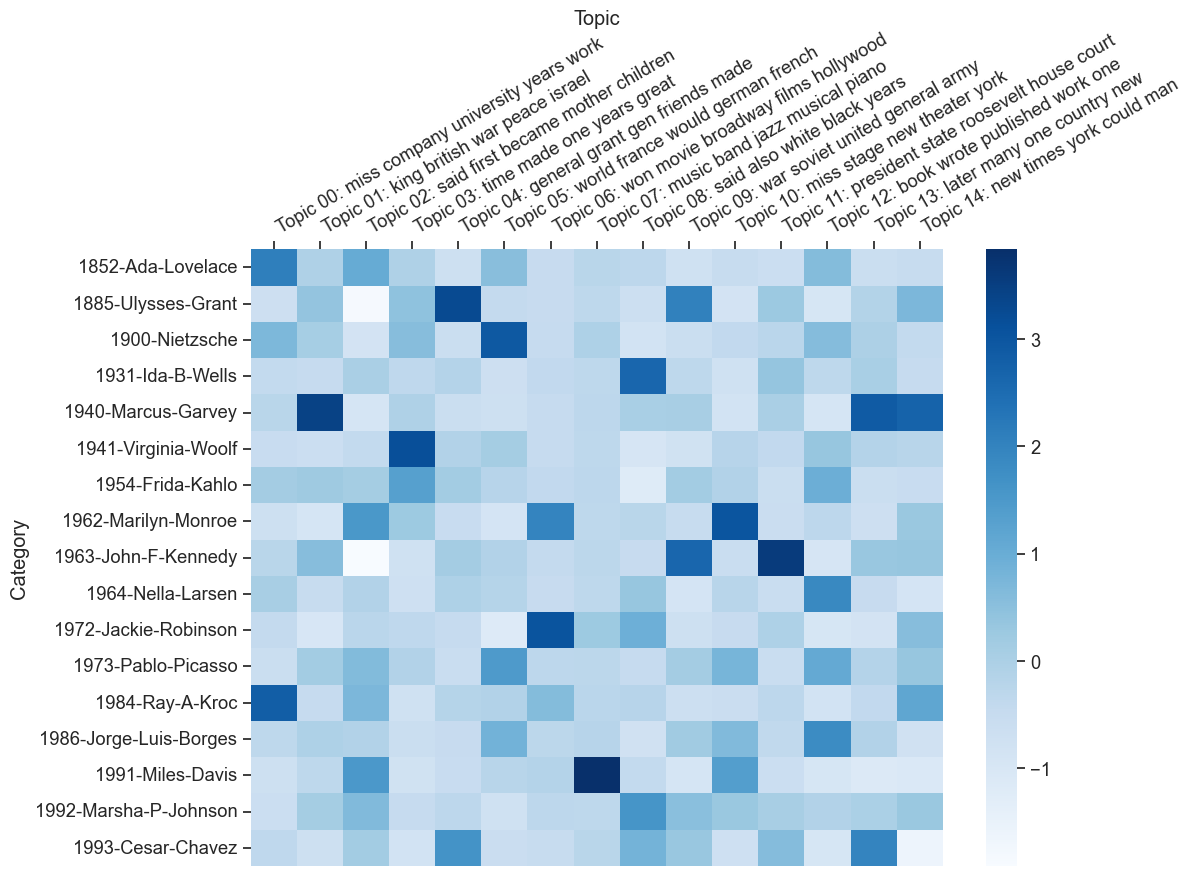

In [19]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

## Output a CSV File

In [20]:
import pandas as pd

topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [23]:
df

,document,Topic 0 miss company university years,Topic 1 king british war peace,Topic 2 said first became mother,Topic 3 time made one years,Topic 4 general grant gen friends,Topic 5 world france would german,Topic 6 won movie broadway films,Topic 7 music band jazz musical,Topic 8 said also white black,Topic 9 war soviet united general,Topic 10 miss stage new theater,Topic 11 president state roosevelt house,Topic 12 book wrote published work,Topic 13 later many one country,Topic 14 new times york could
0,1945-Adolf-Hitler,0.003998,0.052907,0.038183,0.090631,0.041851,0.272187,0.005270,0.003061,0.032411,0.209365,0.002381,0.038918,0.003880,0.159284,0.045673
1,1915-F-W-Taylor,0.382229,0.006007,0.040814,0.011261,0.108247,0.010732,0.017462,0.004687,0.064084,0.002045,0.025165,0.045062,0.080865,0.056370,0.144970
2,1975-Chiang-Kai-shek,0.003562,0.017498,0.048794,0.041924,0.049930,0.051868,0.002500,0.000403,0.071439,0.425720,0.000832,0.040835,0.022936,0.178661,0.043098
3,1984-Ethel-Merman,0.002241,0.002951,0.087714,0.121265,0.014088,0.030561,0.233964,0.060015,0.100188,0.000439,0.216502,0.003853,0.004887,0.027888,0.093444
4,1953-Jim-Thorpe,0.015850,0.021086,0.068527,0.131478,0.035537,0.011617,0.449206,0.006698,0.081478,0.021061,0.002694,0.029805,0.005263,0.032954,0.086747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1987-Andres-Segovie,0.006756,0.015406,0.095275,0.110522,0.014879,0.039300,0.000447,0.281958,0.051393,0.010997,0.171608,0.013725,0.049929,0.061056,0.076749
375,1987-Rita-Hayworth,0.010537,0.047327,0.111429,0.086836,0.021681,0.026919,0.158125,0.000228,0.078838,0.008181,0.324379,0.012644,0.028124,0.048419,0.036332
376,1993-William-Golding,0.047350,0.042668,0.101566,0.163478,0.036993,0.054060,0.046941,0.000459,0.084125,0.012064,0.031640,0.003569,0.305274,0.055772,0.014039
377,1932-Florenz-Ziegfeld,0.029770,0.018054,0.061188,0.204121,0.038766,0.044261,0.213617,0.036263,0.062639,0.000760,0.078390,0.003791,0.025719,0.074158,0.108504


In [24]:
df.sort_values(by='Topic 7 music band jazz musical', ascending=False)[:6]

,document,Topic 0 miss company university years,Topic 1 king british war peace,Topic 2 said first became mother,Topic 3 time made one years,Topic 4 general grant gen friends,Topic 5 world france would german,Topic 6 won movie broadway films,Topic 7 music band jazz musical,Topic 8 said also white black,Topic 9 war soviet united general,Topic 10 miss stage new theater,Topic 11 president state roosevelt house,Topic 12 book wrote published work,Topic 13 later many one country,Topic 14 new times york could
348,1983-Earl-Hines,0.016744,0.001620,0.098582,0.111423,0.002794,0.005206,0.016193,0.535578,0.083910,0.016249,0.016160,0.001868,0.031981,0.036905,0.024788
353,1993-Dizzy-Gillespie,0.006825,0.012989,0.124421,0.094888,0.028999,0.024149,0.037285,0.511854,0.033391,0.000414,0.036492,0.000499,0.021880,0.029474,0.036441
235,1991-Miles-Davis,0.000567,0.019191,0.149557,0.057779,0.021961,0.027519,0.029750,0.463009,0.079487,0.000430,0.061520,0.000518,0.000717,0.037121,0.050874
164,1984-Count-Basie,0.008501,0.002028,0.137130,0.105632,0.035726,0.007766,0.015505,0.427758,0.099782,0.005188,0.040135,0.014811,0.010237,0.019516,0.070285
288,1986-Benny-Goodman,0.005479,0.006280,0.092585,0.063830,0.011631,0.032268,0.052006,0.423876,0.110282,0.007996,0.071421,0.017105,0.014621,0.030448,0.060173
29,1983-Muddy-Waters,0.005819,0.016610,0.162999,0.058103,0.037705,0.007511,0.013396,0.412791,0.133101,0.002406,0.044864,0.019892,0.001386,0.021340,0.062079


In [294]:
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)

## Your Turn!

Choose a topic from the results above and write down its corresponding topic number below.

**Topic: *Your Number Choice Here***

**1.** Display the top 6 obituary titles for this topic.

In [554]:
#Your Code Here

**2.** Display the topic words in the context of the original obituary for these 6 top titles.

In [554]:
#Your Code Here

**3.** Come up with a label for your topic and write it below:

**Topic Label: *Your Label Here***

**Reflection**

**4.** Why did you label your topic the way you did? What do you think this topic means in the context of all the *NYT* obituaries?

**#**Your answer here

**5.** What's another collection of texts that you think might be interesting to topic model? Why?

**#**Your answer here